In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from hashlib import md5 

In [2]:
properties_qm9 = ['G', 'H', 'L']
subsets = [-1, 0, 1, 2]
train_sizes_qm9 = {-1: 64000, 0:32000, 1:32000, 2:16000}
sigmas_qm9 = {-1: 256.0, 0: 256.0, 1: 256.0, 2: 256.0}
res_qm9 = {}
for p in properties_qm9:
    res_p = {}
    for sub in subsets:
        sig = sigmas_qm9[sub]
        n_train = train_sizes_qm9[sub]
        text = f'qm9 loop {p} {sub} slatm laplacian {sig} -12 {n_train}'
        hash_str = md5(bytes(text, 'utf-8')).hexdigest()
        with open(f'../results/res_sum_scatter_{hash_str}.pkl', 'rb') as inf:
            res_p[sub] = pickle.load(inf)
    res_qm9[p] = res_p

In [3]:
res_qm9['G'][0]['Y_ref'].keys()

dict_keys([1000, 2000, 4000, 8000, 16000, 32000])

In [4]:
res_qm9['G'][-1][0]['Y_ref'].keys()

dict_keys([1000, 2000, 4000, 8000, 16000, 32000, 64000])

In [5]:
res_qm9['G'][-1][0].keys()

dict_keys(['Y_ref', 'Y_pred', 'train_ind', 'test_ind'])

In [6]:
def scatter_subplot(ax, y_ref_tot, y_pred_tot, y_ref_sub, y_pred_sub, color_tot, color_sub, label, xticks, fs):
    
    ax.scatter(y_ref_tot, y_pred_tot, marker='.', color=color_tot, label=label[0], s=1)
    ax.scatter(y_ref_sub, y_pred_sub, marker='.', color=color_sub, label=label[1], s=1)

    ax.set_xticks(xticks)
    ax.set_yticks(xticks)
    
    xlow = xticks[0] - (xticks[1] - xticks[0]) / 2
    xhigh = xticks[-1] + (xticks[-1] - xticks[-2]) / 2
    
    ax.set_xlim(xlow, xhigh)
    ax.set_ylim(xlow, xhigh)
    
    x_ideal = np.linspace(xlow, xhigh, num=100, endpoint=True)
    ax.plot(x_ideal, x_ideal, color='black', lw=1.)

    ax.tick_params(axis='both', labelsize=fs, direction='in', length=2, width=1., pad=2)

    for side, sp in ax.spines.items():
        sp.set_linewidth(1.)
        
    return ax

In [7]:
def get_min_max_values(res, sub, n_train):
    
    ymin = min(np.amin(res[-1][sub]['Y_ref'][n_train]), np.amin(res[-1][sub]['Y_pred'][n_train]))
    ymax = max(np.amax(res[-1][sub]['Y_ref'][n_train]), np.amax(res[-1][sub]['Y_pred'][n_train]))
    
    ymin_sub = min(np.amin(res[sub]['Y_ref'][n_train]), np.amin(res[sub]['Y_pred'][n_train]))
    ymax_sub = max(np.amax(res[sub]['Y_ref'][n_train]), np.amax(res[sub]['Y_pred'][n_train]))
    
    return (min(ymin, ymin_sub), max(ymax, ymax_sub))

In [8]:
def single_scatter_plot(res, sub, n_train, color, color_sub, labels, xticks, save=False, filename='figure.png'):
    
    fs = 6.
    
    fig = plt.figure(figsize=(1., 1.), dpi=600)
    ax = fig.add_subplot(111)
    
    y_ref = res[-1][sub]['Y_ref'][n_train]
    y_pred = res[-1][sub]['Y_pred'][n_train]
    
    y_ref_sub = res[sub]['Y_ref'][n_train]
    y_pred_sub = res[sub]['Y_pred'][n_train]
    
    ax = scatter_subplot(ax, y_ref, y_pred, y_ref_sub, y_pred_sub, color, color_sub, labels, xticks, fs)
    
    ax.set_xticklabels(xticks)
    ax.set_yticklabels(xticks)
    
    ax.legend(fontsize=fs, frameon=False, loc='center', bbox_transform=ax.transAxes, 
              bbox_to_anchor=(.5, 1.1), handletextpad=.05, ncol=2, markerscale=4., 
              columnspacing=0.8)
    
    if save:
        plt.savefig(filename, bbox_inches='tight')
        
    return

In [9]:
get_min_max_values(res_qm9['G'], 0, 32000)

(1.6326831747592798, 8.672268796596375)

In [10]:
xticks_qm9 = {}
xticks_qm9['G'] = {}
xticks_qm9['G'][0] = [2, 4, 6, 8]

In [11]:
labels_qm9 = {}
labels_qm9[0] = ['QML', 'SML']

In [12]:
labels_qm9[0]

['QML', 'SML']

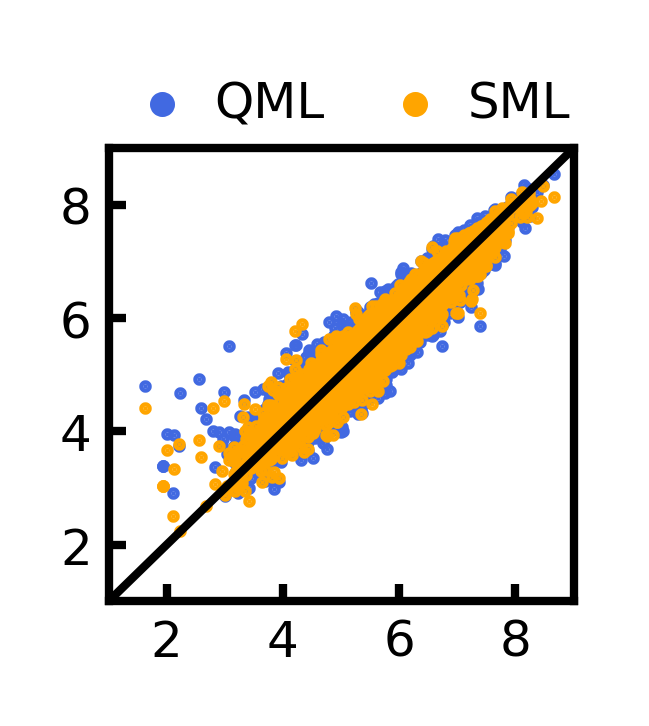

In [13]:
single_scatter_plot(res_qm9['G'], 0, 32000, 'royalblue', 'orange', labels_qm9[0], xticks_qm9['G'][0], 
                    save=True, filename='../figures/scatter_qm9_G_1.png')

In [14]:
xticks_qm9['G'][1] = [1, 3, 5, 7, 9]
labels_qm9[1] = ['QML', 'SML']

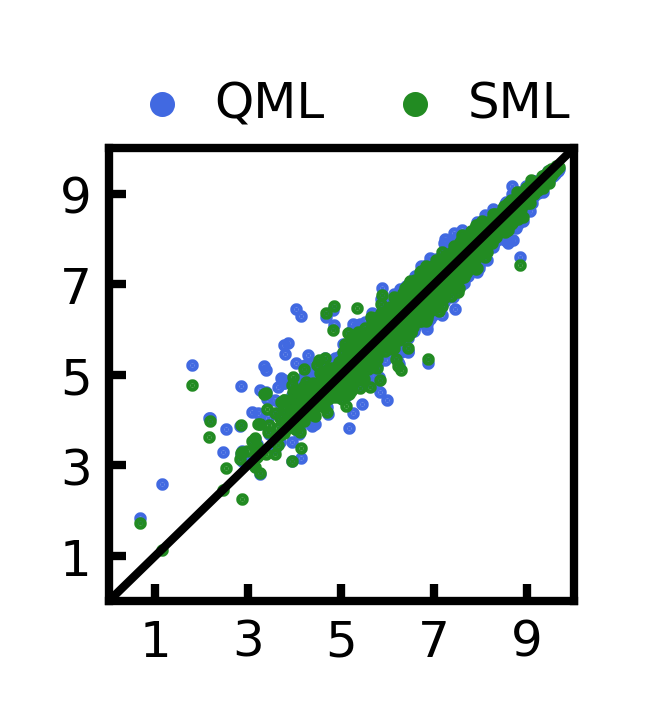

In [15]:
single_scatter_plot(res_qm9['G'], 1, 32000, 'royalblue', 'forestgreen', labels_qm9[1], xticks_qm9['G'][1])

In [16]:
get_min_max_values(res_qm9['G'], 2, 16000)

(2.2394970880448124, 16.928203383629135)

In [17]:
xticks_qm9['G'][2] = [4, 8, 12, 16]
labels_qm9[2] = ['QML', 'SML']

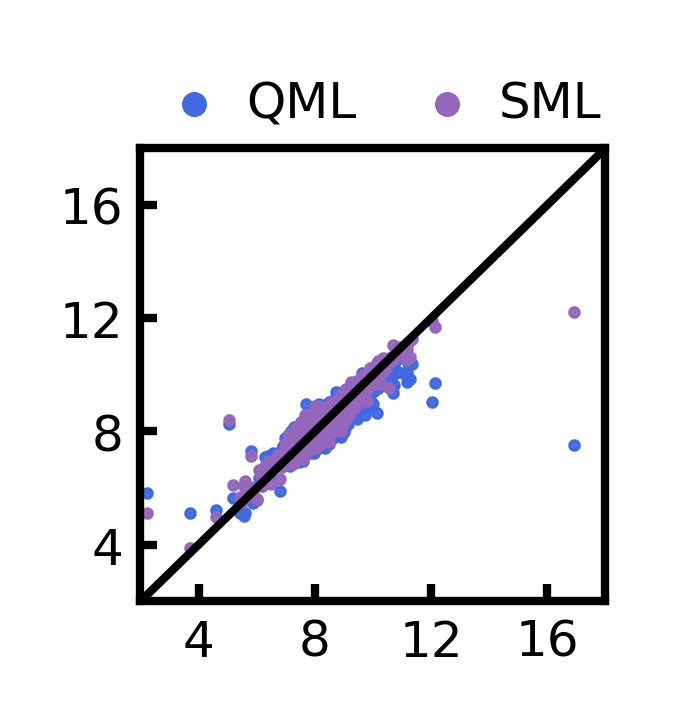

In [18]:
single_scatter_plot(res_qm9['G'], 2, 16000, 'royalblue', 'tab:purple', labels_qm9[2], xticks_qm9['G'][2])

In [19]:
from matplotlib import gridspec

In [20]:
def scatter_subplots_row(res, subsets, train_sizes, color, color_subsets, labels_subsets, xticks_subsets, 
                         save=False, filename='figure.png'):
    
    fs = 6.
    
    fig = plt.figure(figsize=(3, 1), dpi=600)
    gs = gridspec.GridSpec(1, 3, figure=fig, hspace=0.1, wspace=.3)
    
    axs = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1]), fig.add_subplot(gs[2])]
    
    for i, (ax, sub) in enumerate(zip(axs, subsets)):
        
        n_train = train_sizes[i]
        y_ref = res[-1][sub]['Y_ref'][n_train]
        y_pred = res[-1][sub]['Y_pred'][n_train]
    
        y_ref_sub = res[sub]['Y_ref'][n_train]
        y_pred_sub = res[sub]['Y_pred'][n_train]
        
        ax = scatter_subplot(ax, y_ref, y_pred, y_ref_sub, y_pred_sub, color, color_subsets[i], labels_subsets[i], xticks_subsets[i], fs)
        
        ax.set_xticklabels(xticks_subsets[i])
        ax.set_yticklabels(xticks_subsets[i])
        
        ax.legend(fontsize=fs, frameon=False, bbox_transform=ax.transAxes, 
                  bbox_to_anchor=(.5, 1.1), handletextpad=0., loc='center', 
                  ncol=2, markerscale=4., columnspacing=.5)
        
    if save:
        plt.savefig(filename)
        
    return

In [21]:
train_sizes_qm9 = [32000, 32000, 16000]
color_subsets = ['orange', 'forestgreen', 'tab:purple']

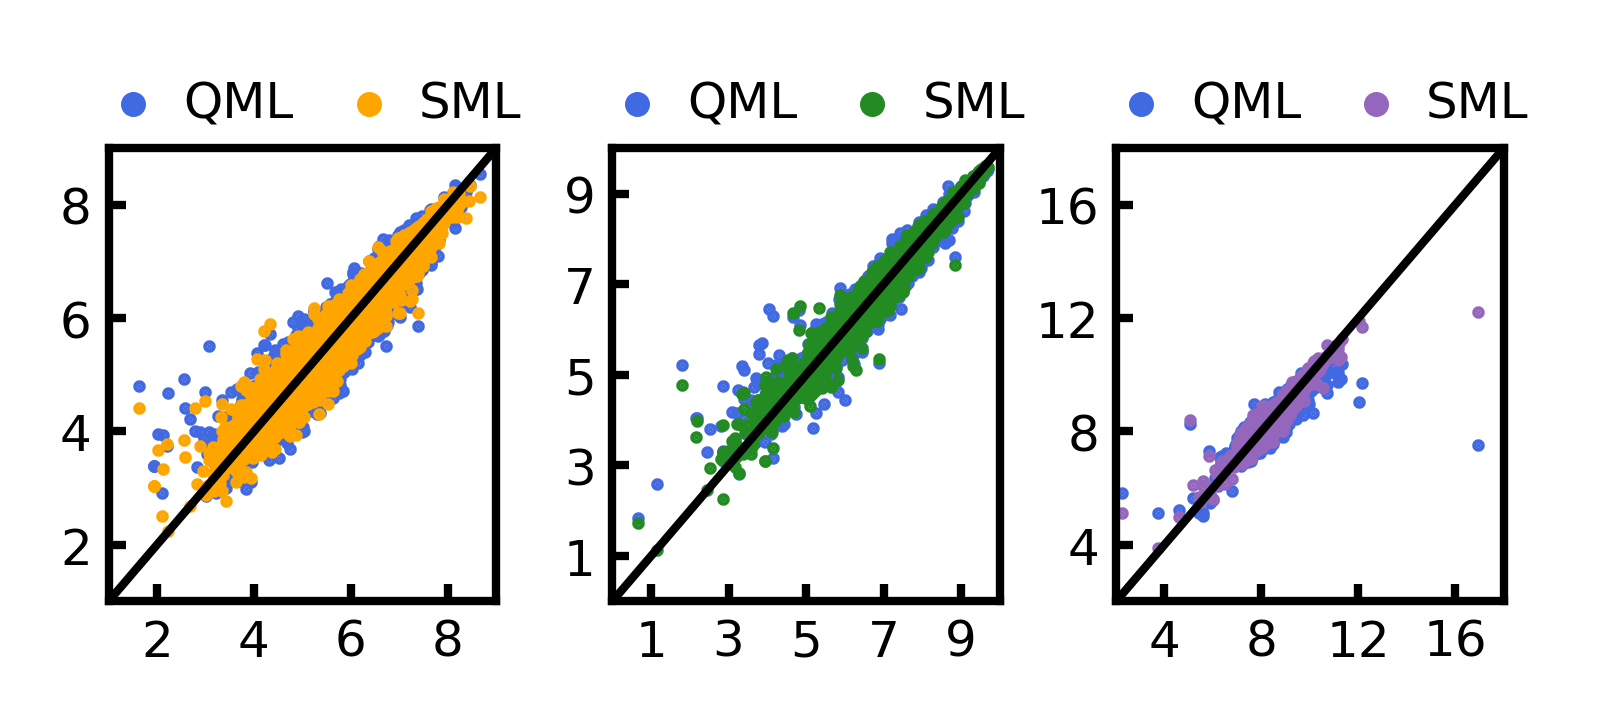

In [22]:
scatter_subplots_row(res_qm9['G'], [0, 1, 2], train_sizes_qm9, 'royalblue', color_subsets, labels_qm9, xticks_qm9['G'])

In [23]:
def scatter_subplots_array(res, props, subsets, train_sizes, color, color_subsets, labels_subsets, xticks_subsets, x_label, y_labels, 
                           save=False, filename='figure.png'):
    
    fs = 6.
    
    fig = plt.figure(figsize=(5, 3), dpi=600)
    gs = gridspec.GridSpec(3, 3, figure=fig, wspace=1.0, hspace=.3)
    
    axs = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1]), fig.add_subplot(gs[2]), 
           fig.add_subplot(gs[3]), fig.add_subplot(gs[4]), fig.add_subplot(gs[5]), 
           fig.add_subplot(gs[6]), fig.add_subplot(gs[7]), fig.add_subplot(gs[8])]
    
    for i, p in enumerate(props):
        
        for j, (ax, sub) in enumerate(zip(axs[i*3:(i+1)*3], subsets)):

            n_train = train_sizes[j]
            y_ref = res[p][-1][sub]['Y_ref'][n_train]
            y_pred = res[p][-1][sub]['Y_pred'][n_train]

            y_ref_sub = res[p][sub]['Y_ref'][n_train]
            y_pred_sub = res[p][sub]['Y_pred'][n_train]

            ax = scatter_subplot(ax, y_ref, y_pred, y_ref_sub, y_pred_sub, color, color_subsets[j], labels_subsets[j], xticks_subsets[p][j], fs)
            
            ax.set_aspect('equal')

            ax.set_xticklabels(xticks_subsets[p][j])
            ax.set_yticklabels(xticks_subsets[p][j])
            
            if i == 0:
                if j == 0:
                    ax.legend(fontsize=fs, frameon=False, bbox_transform=ax.transAxes, 
                              bbox_to_anchor=(.5, 1.1), handletextpad=0., loc='center', 
                              ncol=2, markerscale=4., columnspacing=.5)
                elif j == 1:
                    ax.legend(fontsize=fs, frameon=False, bbox_transform=ax.transAxes, 
                              bbox_to_anchor=(.5, 1.1), handletextpad=0., loc='center', 
                              ncol=2, markerscale=4., columnspacing=.5)
                else:
                    ax.legend(fontsize=fs, frameon=False, bbox_transform=ax.transAxes, 
                              bbox_to_anchor=(.5, 1.1), handletextpad=0., loc='center', 
                              ncol=2, markerscale=4., columnspacing=.5)
                
                n_train = train_sizes[sub]
                # ax.set_title(r'$N_{\mathrm{tr}} = $%i'%n_train, fontsize=fs, pad=2)
                
    # axs[3].set_ylabel(r'$y_{\mathrm{pred}}$ [eV]', fontsize=fs)
#     axs[0].set_ylabel(y_labels[0], fontsize=fs)
#     axs[3].set_ylabel(y_labels[1], fontsize=fs)
#     axs[6].set_ylabel(y_labels[2], fontsize=fs)
    # axs[7].set_xlabel(r'$y_{\mathrm{ref}}$ [eV]', fontsize=fs)
    axs[7].set_xlabel(x_label, fontsize=fs)
    
    if save:
        plt.savefig(filename, bbox_inches='tight')
       
    return

In [24]:
get_min_max_values(res_qm9['H'], 0, 32000)

(-9.679090087697931, -3.2027801611527873)

In [25]:
get_min_max_values(res_qm9['H'], 1, 32000)

(-10.783872369285044, -2.8435898627057457)

In [26]:
get_min_max_values(res_qm9['H'], 2, 16000)

(-11.662800145030456, -4.28579333374311)

In [27]:
xticks_qm9['H'] = {0: [-9, -7, -5, -3], 
                   1: [-10, -8, -6, -4, -2], 
                   2: [-11, -9, -7, -5]}

In [28]:
get_min_max_values(res_qm9['L'], 0, 32000)

(-4.508926700960211, 1.9973157504555192)

In [29]:
get_min_max_values(res_qm9['L'], 1, 32000)

(-3.039511843676859, 1.9184027303421538)

In [30]:
get_min_max_values(res_qm9['L'], 2, 16000)

(-2.0462962456982976, 5.265403238598678)

In [31]:
xticks_qm9['L'] = {0: [-4, -2, 0, 2], 
                   1: [-3, -2, -1, 0, 1, 2], 
                   2: [-2, 0, 2, 4, 6]}

In [32]:
props = ['G', 'H', 'L']

In [33]:
xticks_qm9

{'G': {0: [2, 4, 6, 8], 1: [1, 3, 5, 7, 9], 2: [4, 8, 12, 16]},
 'H': {0: [-9, -7, -5, -3], 1: [-10, -8, -6, -4, -2], 2: [-11, -9, -7, -5]},
 'L': {0: [-4, -2, 0, 2], 1: [-3, -2, -1, 0, 1, 2], 2: [-2, 0, 2, 4, 6]}}

In [34]:
title_gap = r'$\Delta \epsilon$'
title_homo = r'$\epsilon^{\mathrm{HOMO}}$'
title_lumo = r'$\epsilon^{\mathrm{LUMO}}$'
y_labels = [title_gap, title_homo, title_lumo]
x_label_qm9 = 'B3LYP [eV]'

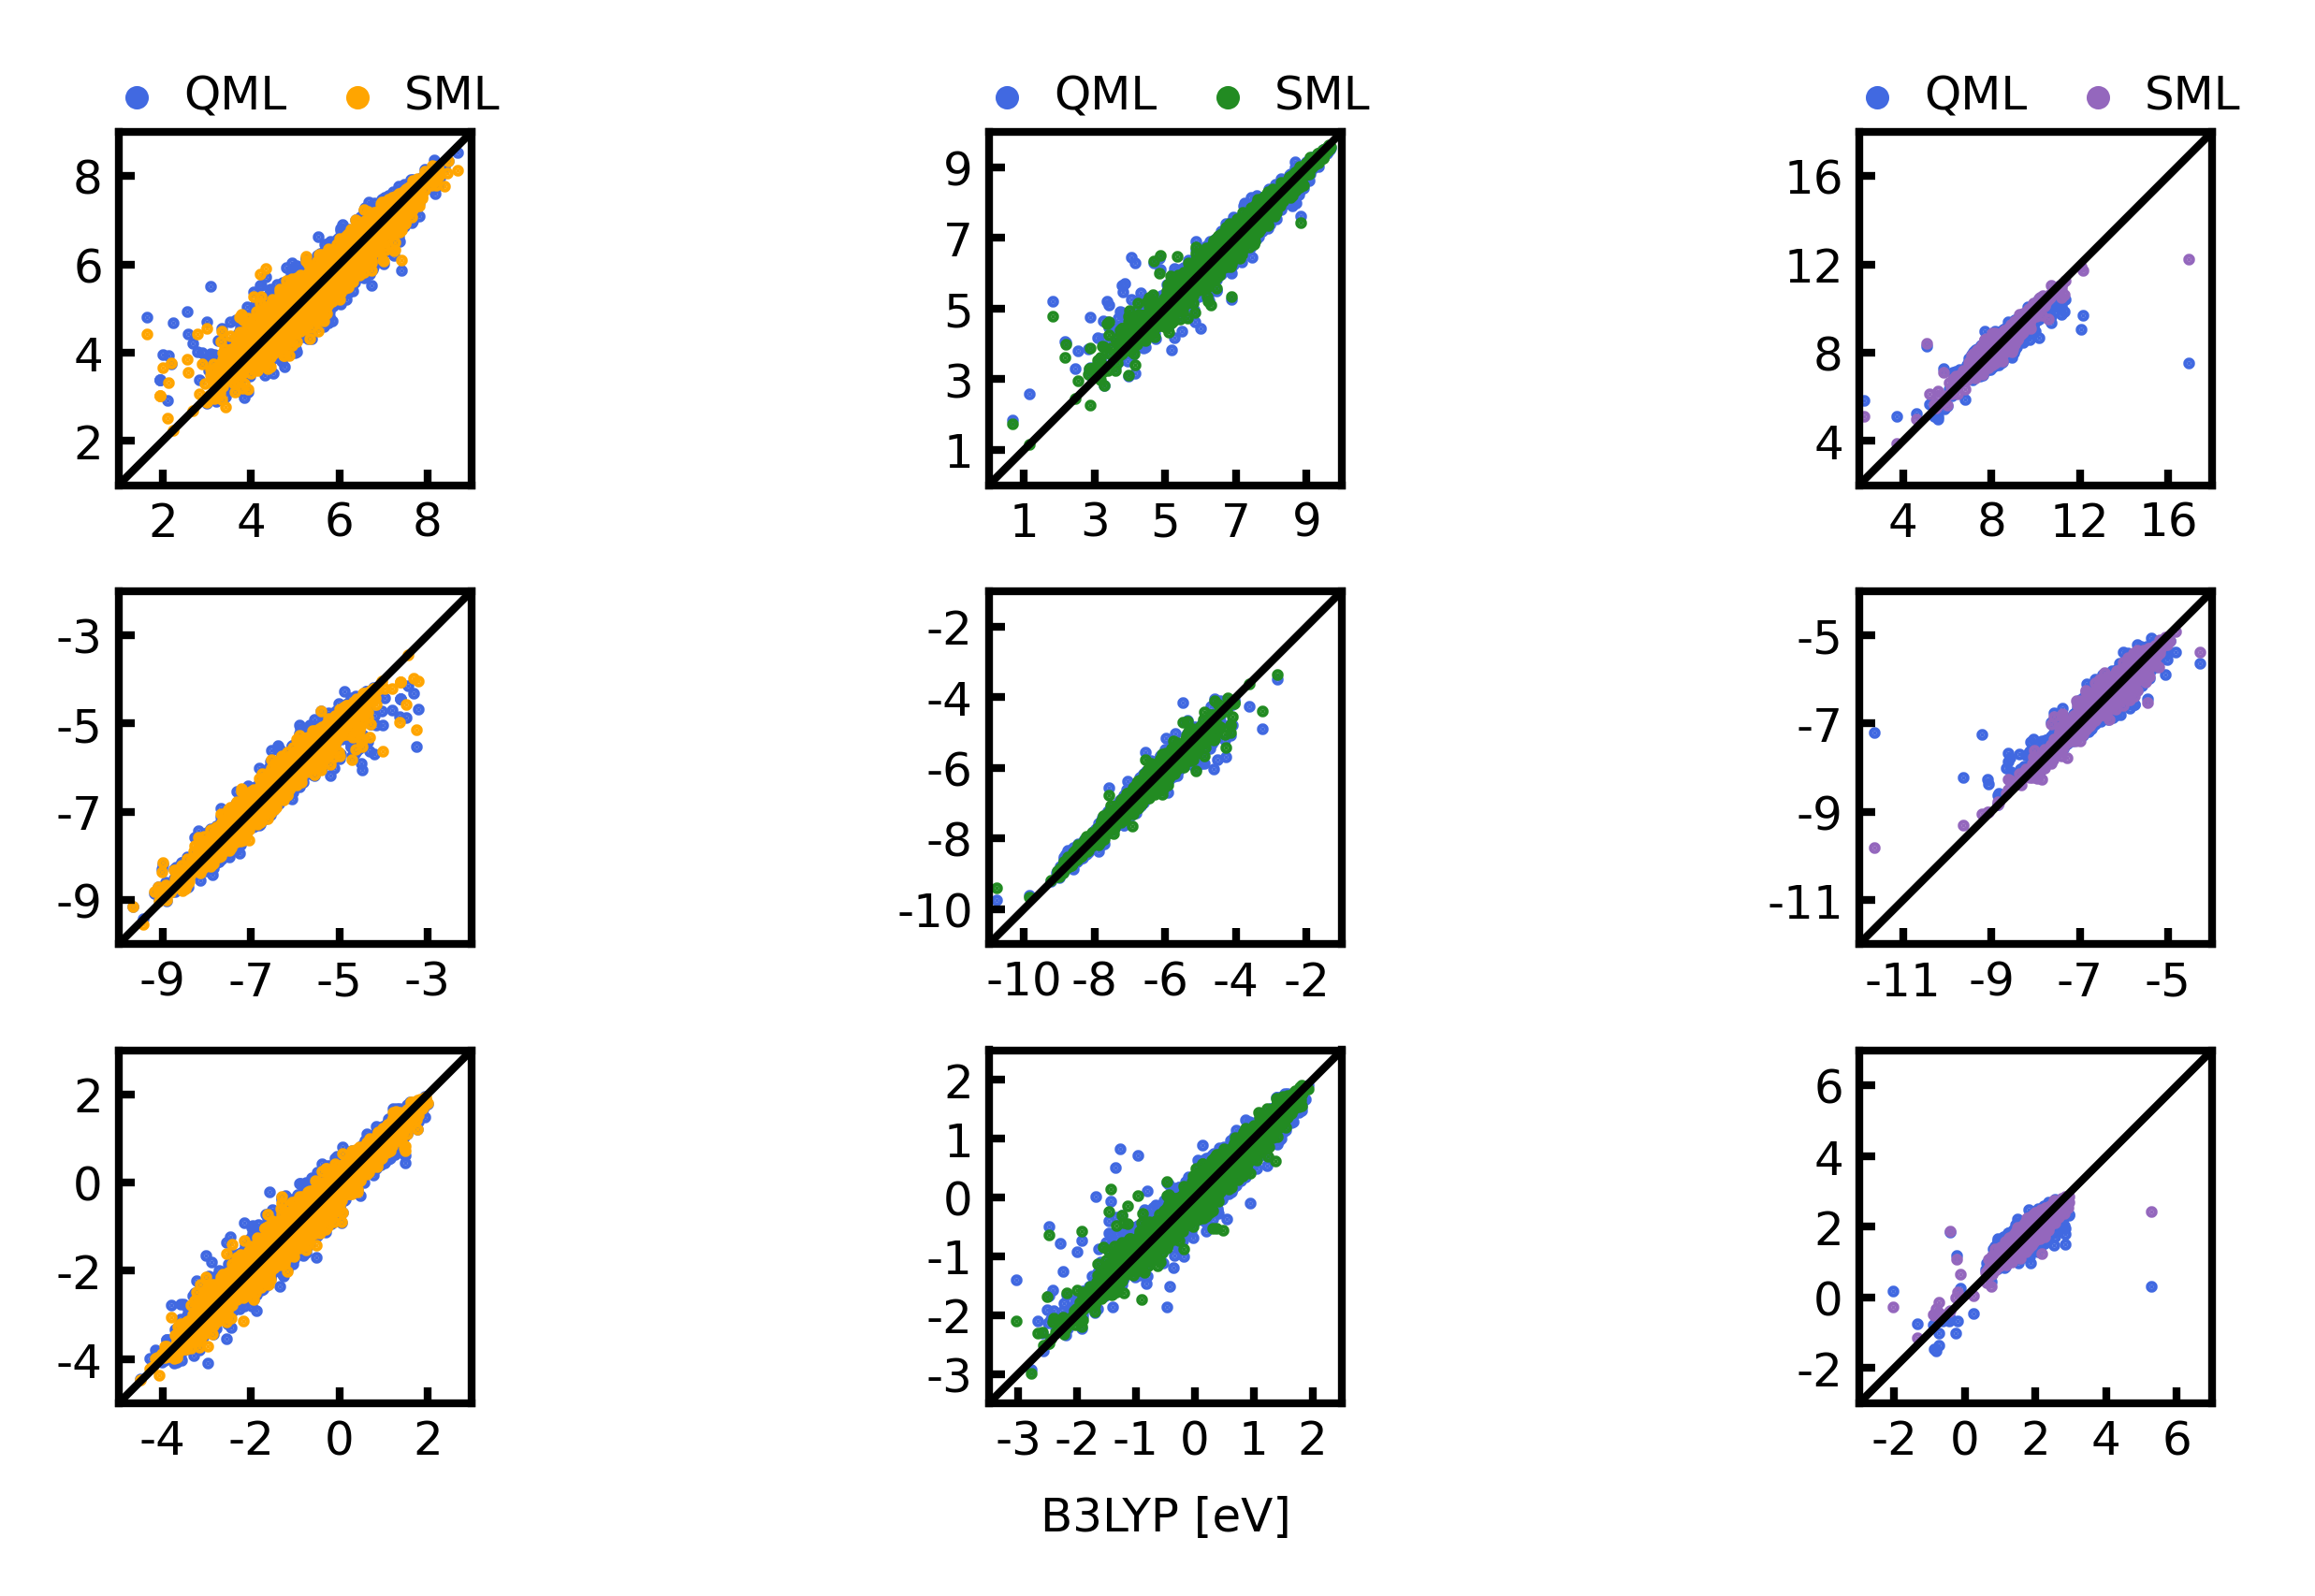

In [36]:
scatter_subplots_array(res_qm9, props, [0, 1, 2], train_sizes_qm9, 'royalblue', color_subsets, labels_qm9, xticks_qm9, x_label_qm9, y_labels, 
                       True, '../figures/scatter_qm9_2.png')

In [37]:
properties_qm7b = ['G_ZINDO', 'H_ZINDO', 'L_ZINDO', 
                   'G_PBE0', 'H_PBE0', 'L_PBE0',
                   'G_GW', 'H_GW', 'L_GW']
sigmas_qm7b = {-1: 128.0, 0: 512.0, 1: 256.0, 2: 256.0}
res_qm7b = {}
for p in properties_qm7b:
    res_p = {}
    for sub in subsets:
        sig = sigmas_qm7b[sub]
        text = f'qm7b loop {p} {sub} slatm laplacian {sig} -12'
        hash_str = md5(bytes(text, 'utf-8')).hexdigest()
        with open(f'../results/res_sum_scatter_{hash_str}.pkl', 'rb') as inf:
            res_p[sub] = pickle.load(inf)
    res_qm7b[p] = res_p

In [38]:
get_min_max_values(res_qm7b['G_GW'], 0, 1600)

(7.599046351140918, 11.8542)

In [39]:
get_min_max_values(res_qm7b['G_GW'], 1, 1600)

(8.407443675252377, 12.3535)

In [40]:
get_min_max_values(res_qm7b['G_GW'], 2, 800)

(8.708080749952039, 12.40980756048722)

In [41]:
xticks_qm7b = {}
xticks_qm7b['G_GW'] = {0: [8, 10, 12], 
                       1: [8, 10, 12], 
                       2: [8, 10, 12]}

In [42]:
get_min_max_values(res_qm7b['H_GW'], 0, 1600)

(-12.219, -7.0384)

In [43]:
get_min_max_values(res_qm7b['H_GW'], 1, 1600)

(-11.1629, -7.657692704998956)

In [44]:
get_min_max_values(res_qm7b['H_GW'], 2, 800)

(-12.0735, -7.5649)

In [45]:
xticks_qm7b['H_GW'] = {0: [-12, -10, -8], 
                       1: [-12, -10, -8], 
                       2: [-12, -10, -8]}

In [46]:
get_min_max_values(res_qm7b['L_GW'], 0, 1600)

(-1.7011, 1.504)

In [47]:
get_min_max_values(res_qm7b['L_GW'], 1, 1600)

(0.5363790165498399, 1.8377)

In [48]:
get_min_max_values(res_qm7b['L_GW'], 2, 800)

(0.6051, 1.4137)

In [49]:
xticks_qm7b['L_GW'] = {0: [-2, -1, 0, 1, 2], 
                       1: [0.5, 1.0, 1.5, 2.0], 
                       2: [0.5, 1.0, 1.5]}

In [50]:
train_sizes_qm7b = [1600, 1600, 800]
color = 'royalblue'
labels_qm7b = labels_qm9

In [51]:
props_gw = ['G_GW', 'H_GW', 'L_GW']
x_label = 'GW [eV]'

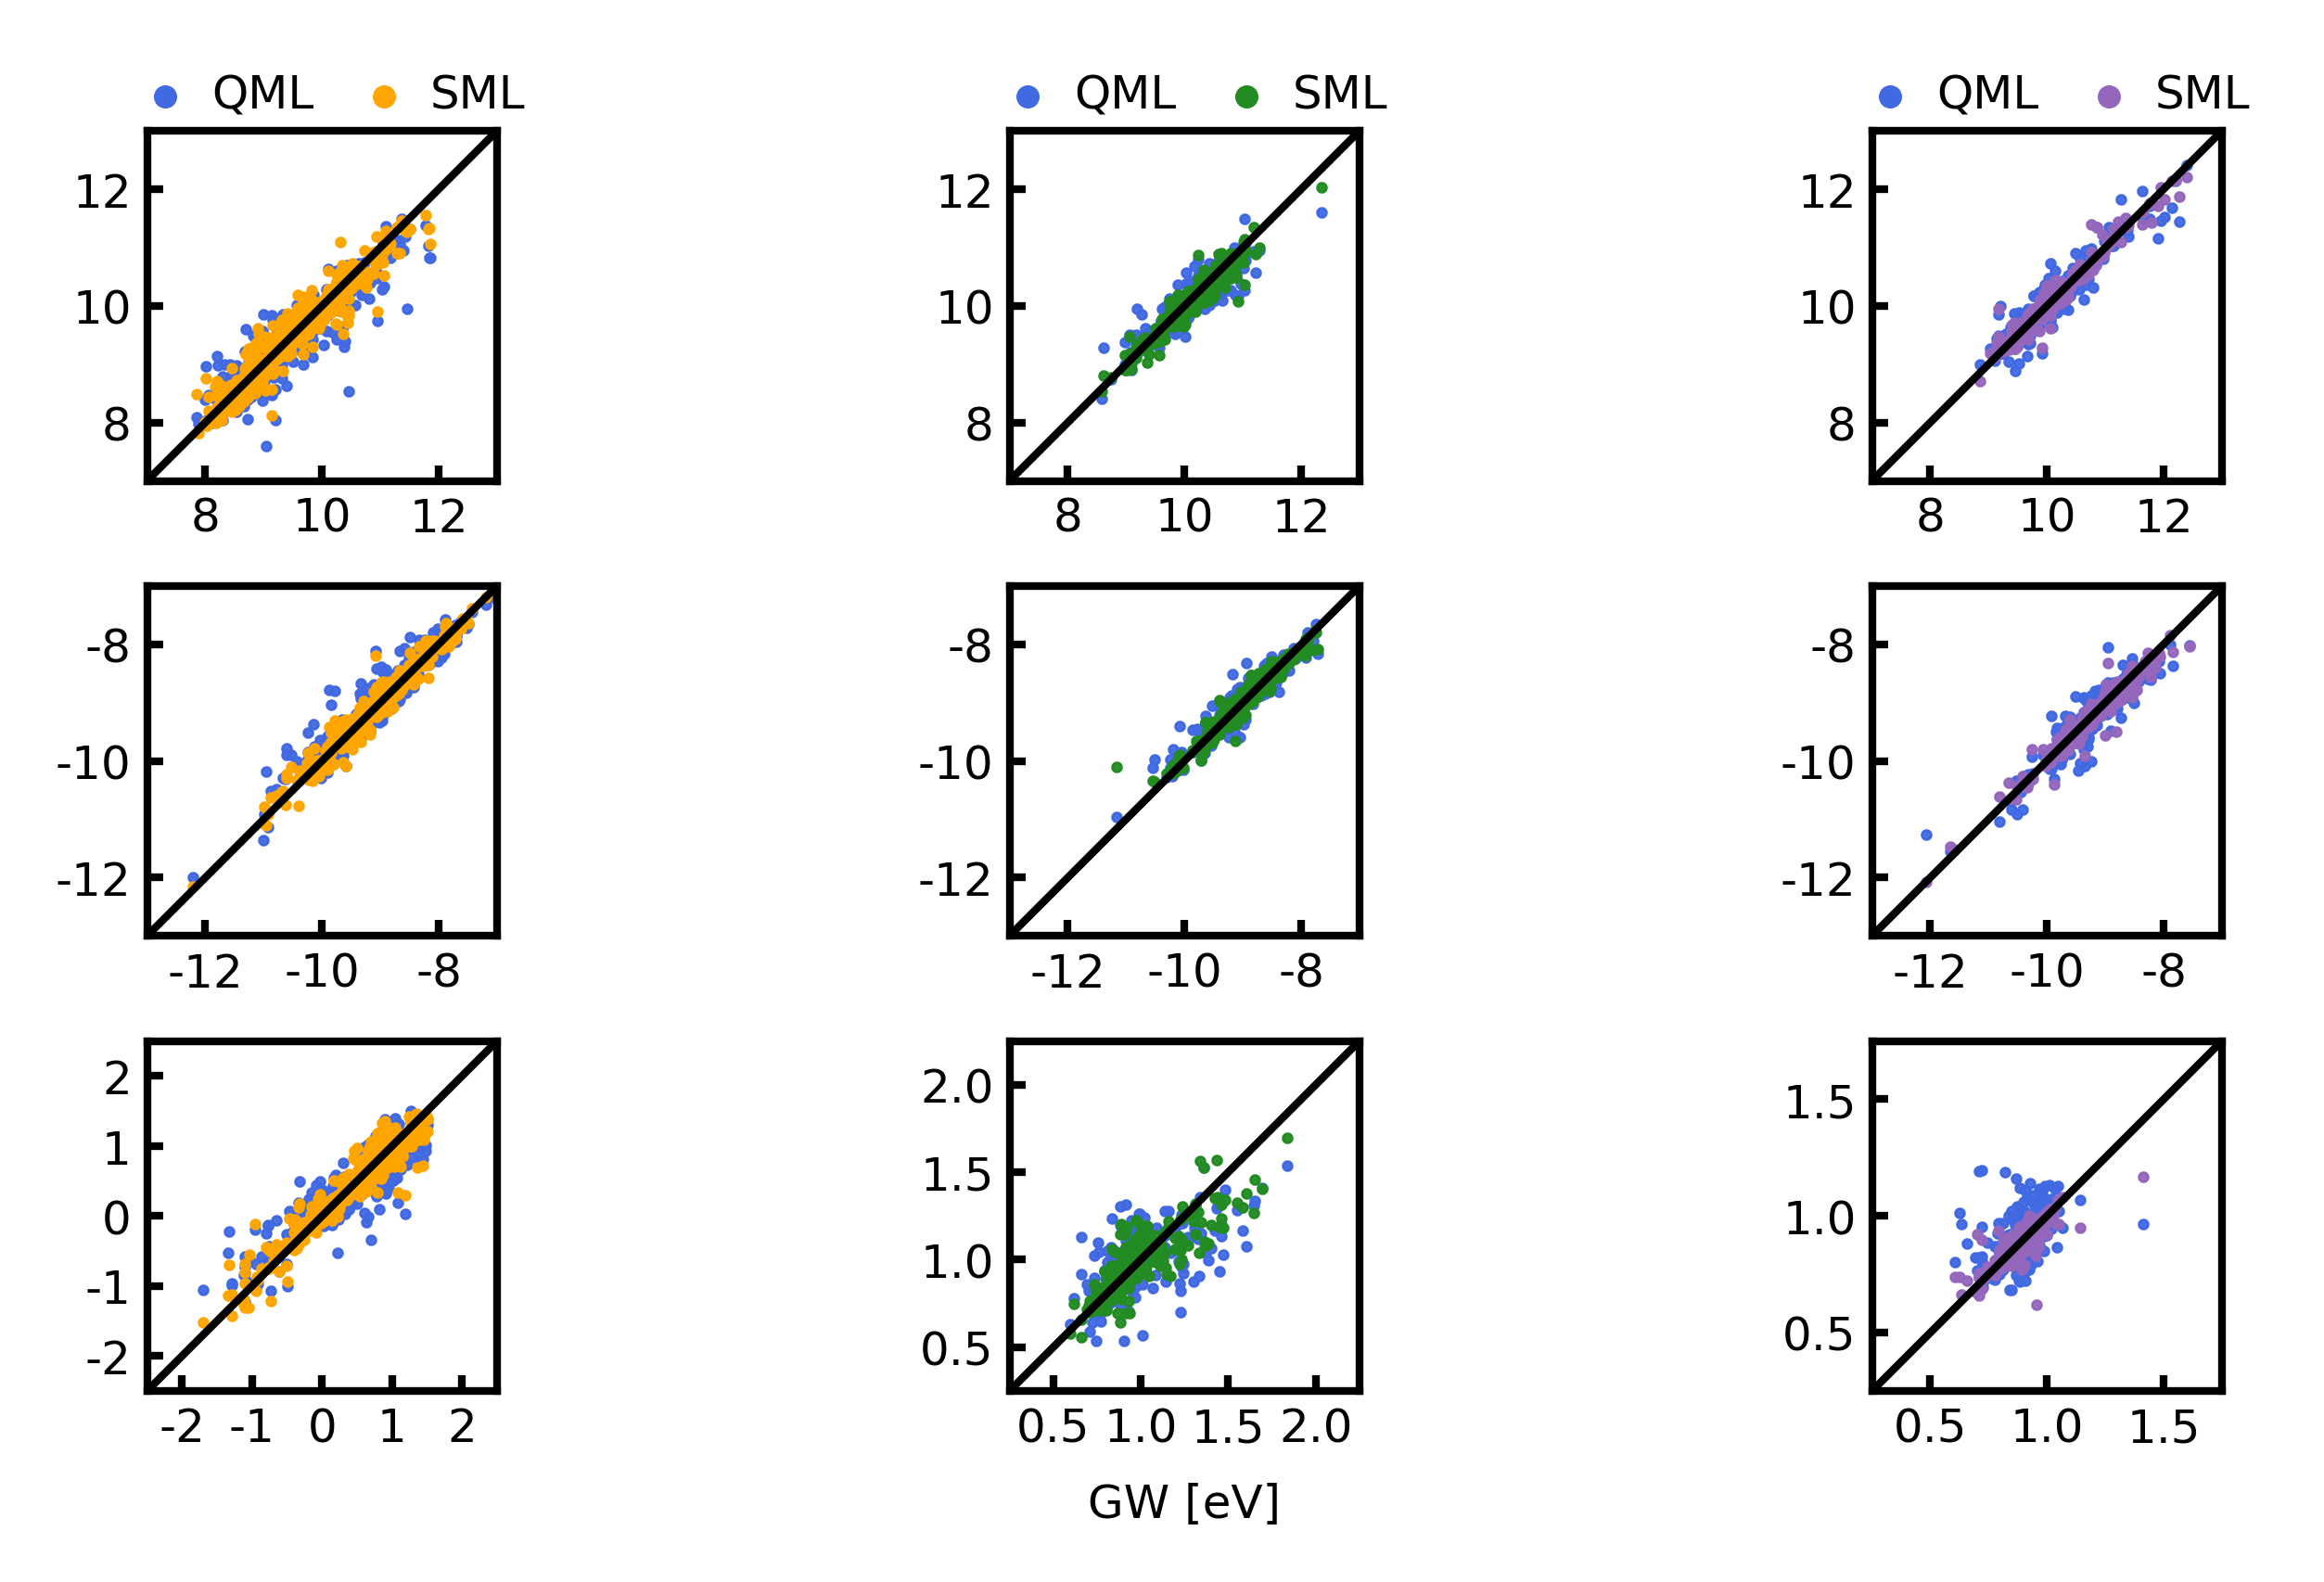

In [52]:
scatter_subplots_array(res_qm7b, props_gw, [0, 1, 2], train_sizes_qm7b, color, color_subsets, labels_qm7b, xticks_qm7b, x_label, y_labels, 
                       True, '../figures/scatter_qm7b_gw_2.png')

In [53]:
property_pairs = [('G_ZINDO', 'G_GW'), ('H_ZINDO', 'H_GW'), ('L_ZINDO', 'L_GW'),
                  ('G_ZINDO', 'G_PBE0'), ('H_ZINDO', 'H_PBE0'), ('L_ZINDO', 'L_PBE0'),
                  ('G_PBE0', 'G_GW'),  ('H_PBE0', 'H_GW'),  ('L_PBE0', 'L_GW')]

res_delta = {}
for p in property_pairs:
    p_base = p[0]
    p_target = p[1]
    res_p = {}
    for sub in subsets:
        sig = sigmas_qm7b[sub]
        text = f'qm7b loop delta {p_base} {p_target} {sub} slatm laplacian {sig} -12'
        hash_str = md5(bytes(text, 'utf-8')).hexdigest()
        with open(f'../results/res_sum_scatter_{hash_str}.pkl', 'rb') as inf:
            res_p[sub] = pickle.load(inf)
    res_delta[f'({p_base},{p_target})'] = res_p

In [54]:
get_min_max_values(res_delta['(G_ZINDO,G_GW)'], 0, 1600)

(7.319616894368081, 12.875351357186583)

In [55]:
get_min_max_values(res_delta['(G_ZINDO,G_GW)'], 1, 1600)

(8.034992100974293, 12.3244)

In [56]:
get_min_max_values(res_delta['(G_ZINDO,G_GW)'], 2, 800)

(8.832799999999999, 12.396321640920538)

In [57]:
xticks_delta = {}
xticks_delta['(G_ZINDO,G_GW)'] = {0: [8, 10, 12], 
                                  1: [8, 10, 12], 
                                  2: [8, 10, 12]}

In [58]:
get_min_max_values(res_delta['(H_ZINDO,H_GW)'], 0, 1600)

(-11.1883, -7.067474021503752)

In [59]:
get_min_max_values(res_delta['(H_ZINDO,H_GW)'], 1, 1600)

(-10.584321120626822, -7.667707262906282)

In [60]:
get_min_max_values(res_delta['(H_ZINDO,H_GW)'], 2, 800)

(-11.9831, -7.707056648783788)

In [61]:
xticks_delta['(H_ZINDO,H_GW)'] = {0: [-11, -9, -7], 
                                  1: [-10, -9, -8, -7], 
                                  2: [-12, -10, -8]}

In [62]:
get_min_max_values(res_delta['(L_ZINDO,L_GW)'], 0, 1600)

(-1.3864, 1.8199688175986415)

In [63]:
get_min_max_values(res_delta['(L_ZINDO,L_GW)'], 1, 1600)

(0.364848193007242, 1.8337)

In [64]:
get_min_max_values(res_delta['(L_ZINDO,L_GW)'], 2, 800)

(0.4846411881534358, 1.9527117524093356)

In [65]:
xticks_delta['(L_ZINDO,L_GW)'] = {0: [-1, 0, 1, 2], 
                                  1: [0.5, 1.0, 1.5, 2.0], 
                                  2: [0.5, 1.0, 1.5, 2.0]}

In [66]:
props_zindo_gw = ['(G_ZINDO,G_GW)', '(H_ZINDO,H_GW)', '(L_ZINDO,L_GW)']

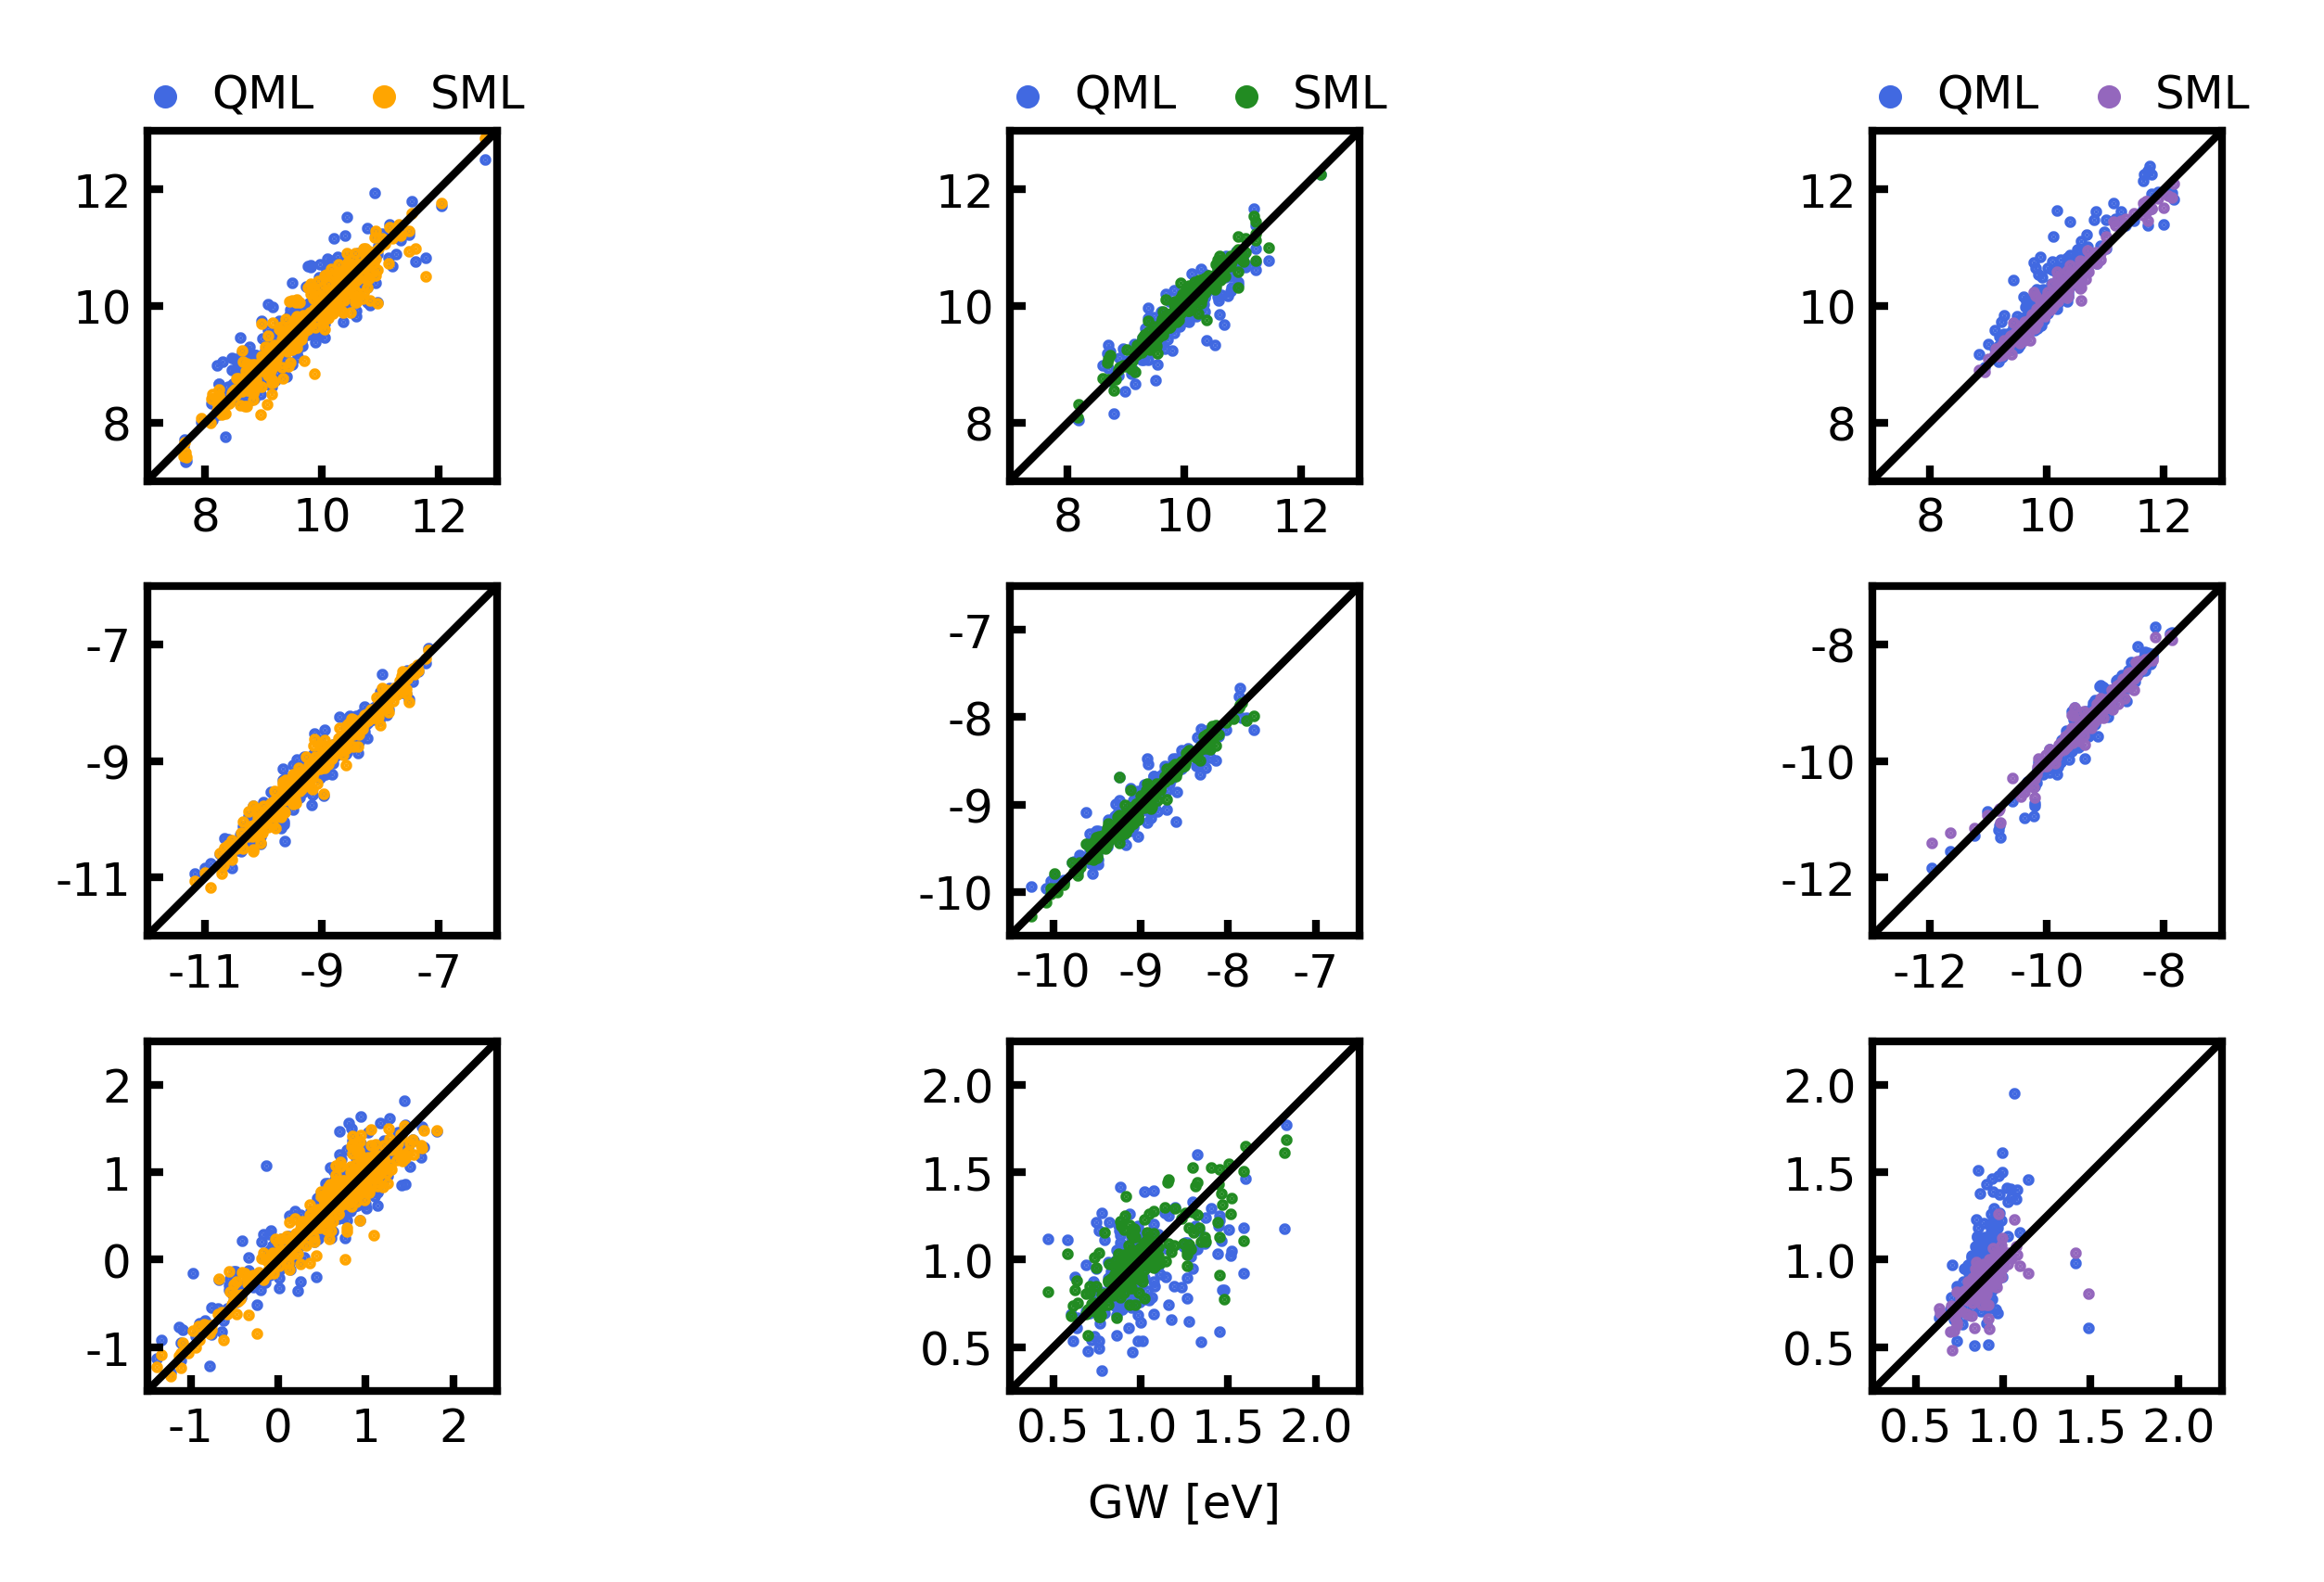

In [67]:
scatter_subplots_array(res_delta, props_zindo_gw, [0, 1, 2], train_sizes_qm7b, color, color_subsets, labels_qm7b, xticks_delta, x_label, y_labels, 
                       True, '../figures/scatter_qm7b_delta_zindo_gw_2.png')

In [68]:
get_min_max_values(res_qm7b['G_ZINDO'], 0, 1600)

(7.438999999999999, 12.91974027725982)

In [69]:
get_min_max_values(res_qm7b['G_ZINDO'], 1, 1600)

(8.578000000000001, 12.722930281909973)

In [70]:
get_min_max_values(res_qm7b['G_ZINDO'], 2, 800)

(10.219, 15.341298039077472)

In [71]:
xticks_qm7b['G_ZINDO'] = {0: [8, 10, 12], 
                          1: [8, 10, 12], 
                          2: [11, 13, 15]}

In [72]:
get_min_max_values(res_qm7b['H_ZINDO'], 0, 1600)

(-11.783196677967188, -7.327055913360528)

In [73]:
get_min_max_values(res_qm7b['H_ZINDO'], 1, 1600)

(-11.783, -8.344)

In [74]:
get_min_max_values(res_qm7b['H_ZINDO'], 2, 800)

(-12.105, -8.237)

In [75]:
xticks_qm7b['H_ZINDO'] = {0: [-11, -9, -7], 
                          1: [-12, -10, -8], 
                          2: [-12, -10, -8]}

In [76]:
get_min_max_values(res_qm7b['L_ZINDO'], 0, 1600)

(-2.091, 2.12)

In [77]:
get_min_max_values(res_qm7b['L_ZINDO'], 1, 1600)

(-0.37, 2.4848728960682482)

In [78]:
get_min_max_values(res_qm7b['L_ZINDO'], 2, 800)

(1.1714255391334563, 3.655)

In [79]:
xticks_qm7b['L_ZINDO'] = {0: [-2, -1, 0, 1, 2], 
                          1: [0, 1, 2], 
                          2: [1, 2, 3, 4]}

In [80]:
props_zindo = ['G_ZINDO', 'H_ZINDO', 'L_ZINDO']
x_label_zindo = 'ZINDO [eV]'

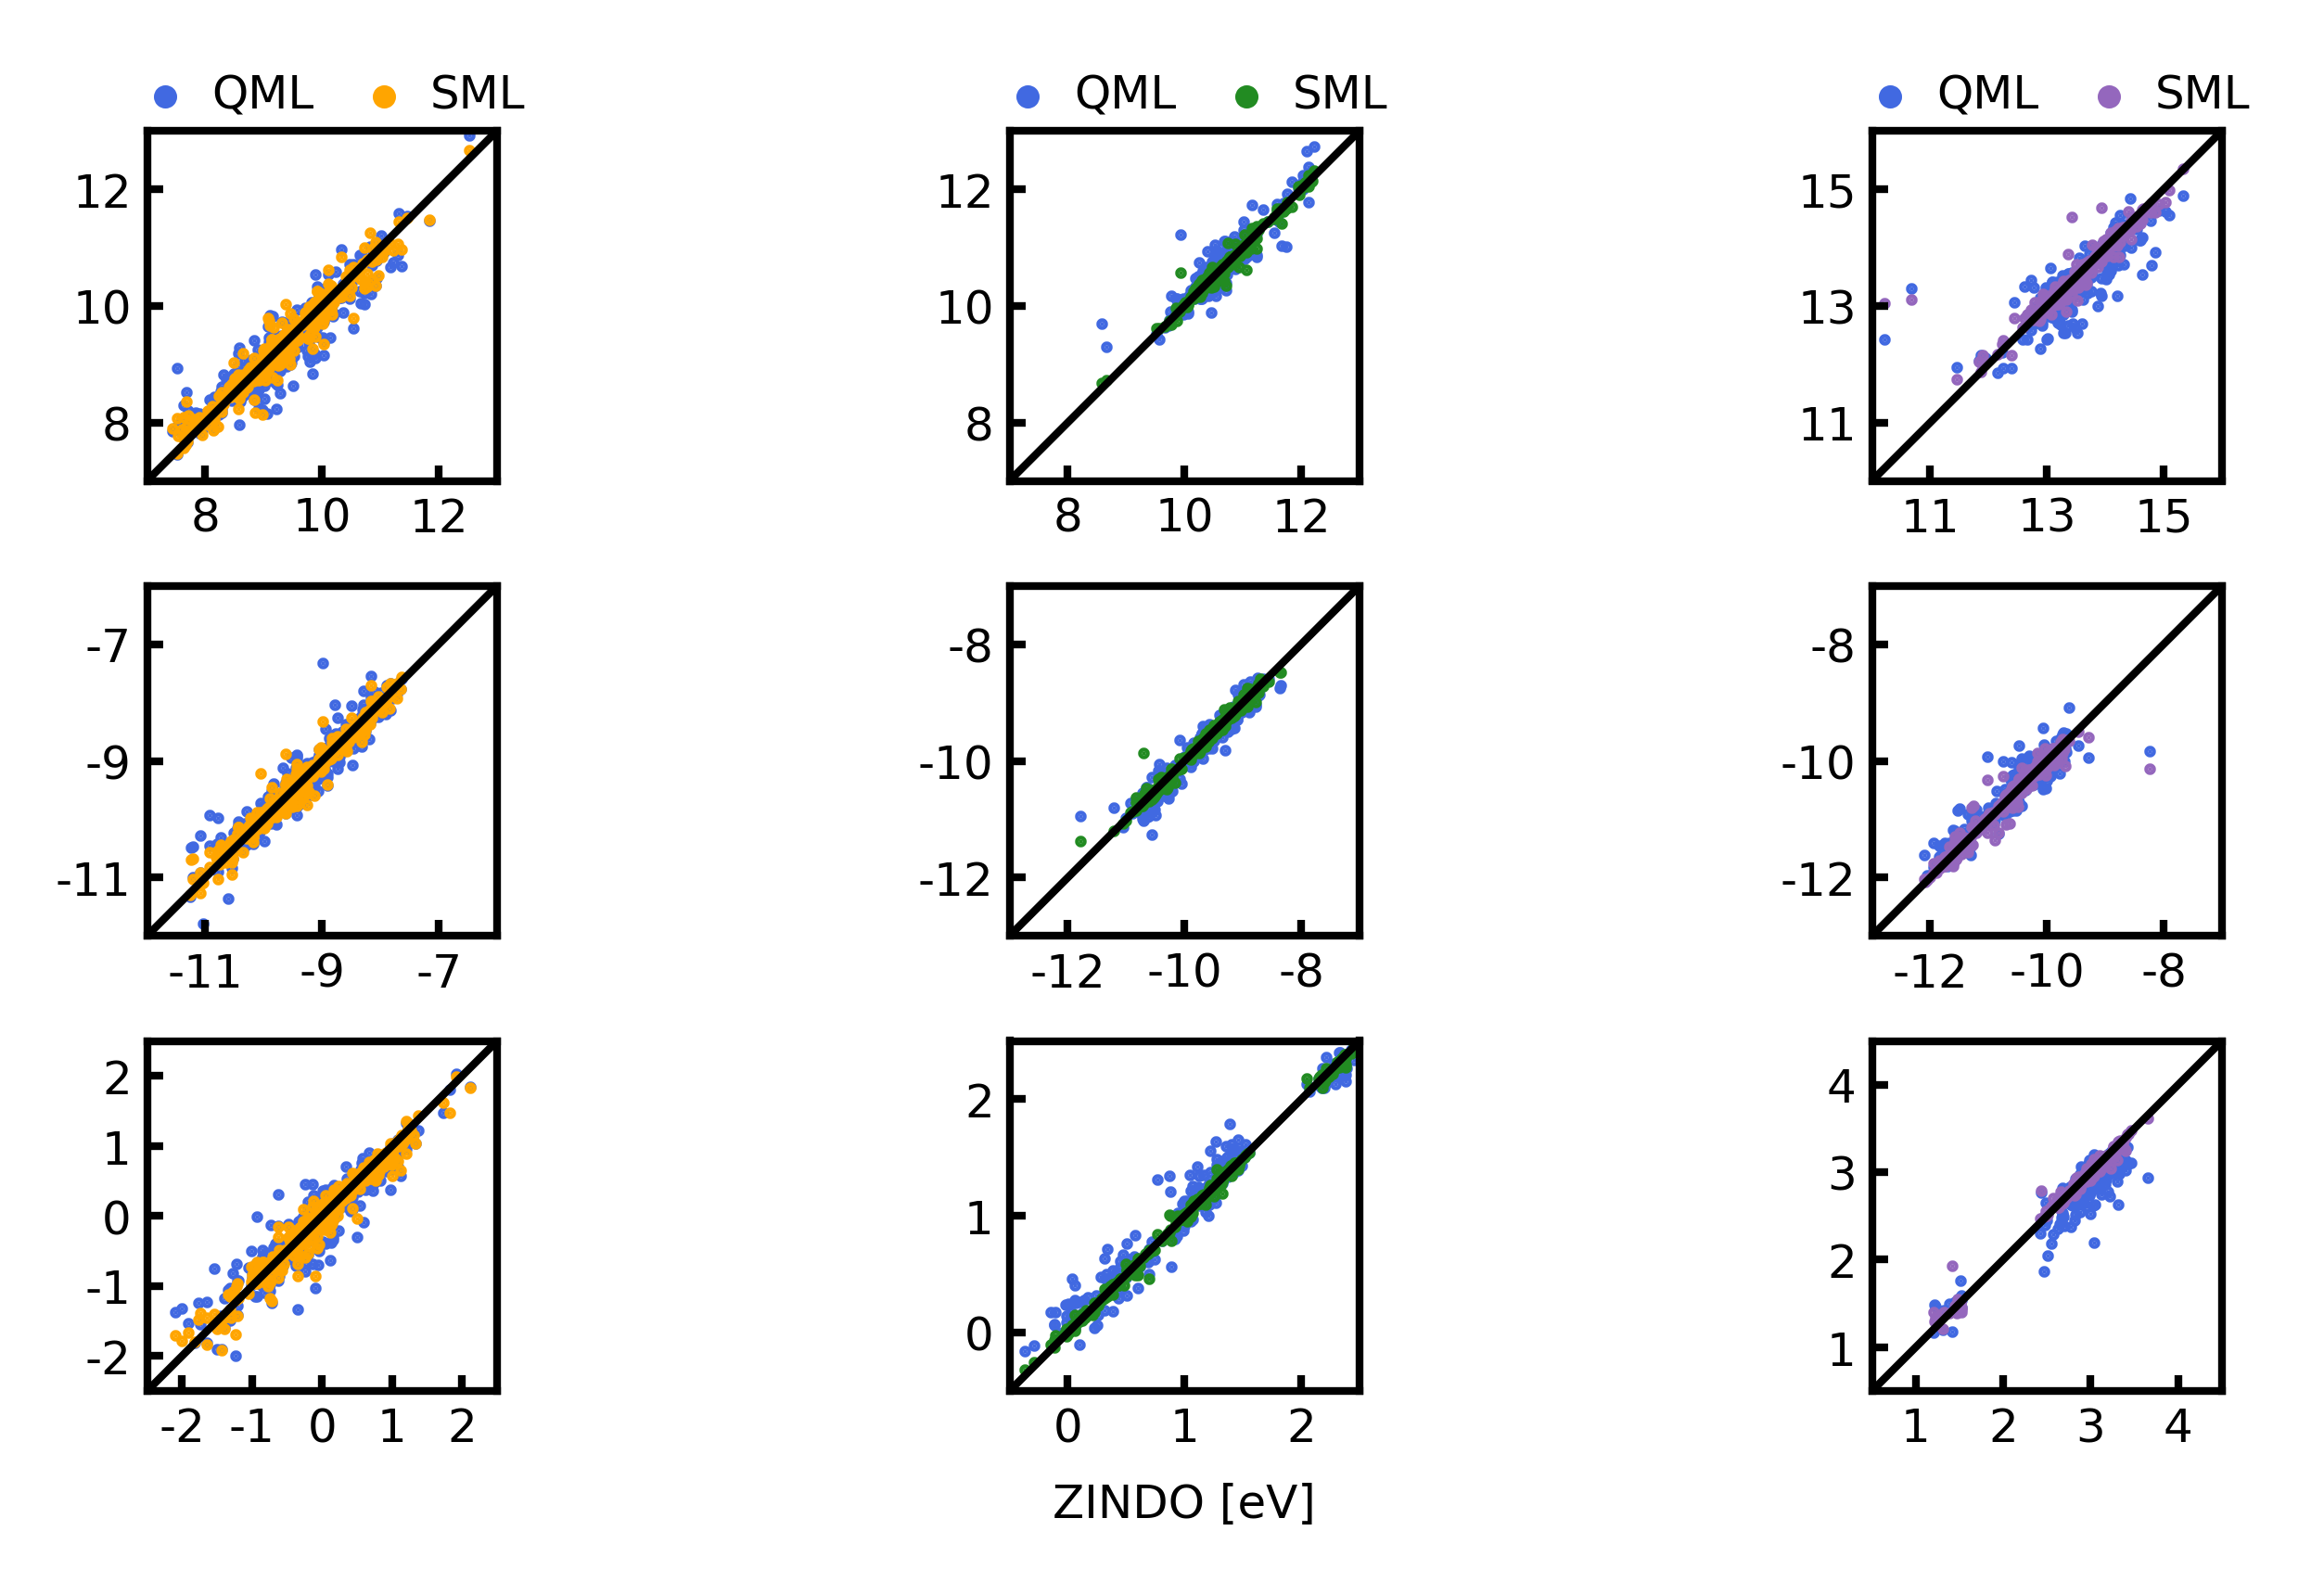

In [81]:
scatter_subplots_array(res_qm7b, props_zindo, [0, 1, 2], train_sizes_qm7b, color, color_subsets, labels_qm7b, xticks_qm7b, x_label_zindo, y_labels, 
                       True, '../figures/scatter_qm7b_zindo.png')

In [82]:
get_min_max_values(res_qm7b['G_PBE0'], 0, 1600)

(4.1669, 9.0489)

In [83]:
get_min_max_values(res_qm7b['G_PBE0'], 1, 1600)

(5.632212563465934, 8.062100000000001)

In [84]:
get_min_max_values(res_qm7b['G_PBE0'], 2, 800)

(5.5393, 9.232)

In [85]:
xticks_qm7b['G_PBE0'] = {0: [5, 7, 9], 
                         1: [6, 7, 8], 
                         2: [6, 7, 8, 9]}

In [86]:
get_min_max_values(res_qm7b['H_PBE0'], 0, 1600)

(-8.939167316841987, -5.133)

In [87]:
get_min_max_values(res_qm7b['H_PBE0'], 1, 1600)

(-8.309, -5.795157062827139)

In [88]:
get_min_max_values(res_qm7b['H_PBE0'], 2, 800)

(-9.1313, -5.8553)

In [89]:
xticks_qm7b['H_PBE0'] = {0: [-8, -7, -6, -5], 
                         1: [-8, -7, -6, -5], 
                         2: [-9, -8, -7, -6]}

In [90]:
get_min_max_values(res_qm7b['L_PBE0'], 0, 1600)

(-3.5773, 0.2087781284104615)

In [91]:
get_min_max_values(res_qm7b['L_PBE0'], 1, 1600)

(-1.3476122681110434, 0.18732833408447291)

In [92]:
get_min_max_values(res_qm7b['L_PBE0'], 2, 800)

(-0.7925254232115353, 0.20411886428434567)

In [93]:
xticks_qm7b['L_PBE0'] = {0: [-4, -3, -2, -1, 0], 
                         1: [-1, 0, 1], 
                         2: [-1.0, -0.5, 0.]}

In [94]:
props_pbe0 = ['G_PBE0', 'H_PBE0', 'L_PBE0']
x_label_pbe0 = 'PBE0 [eV]'

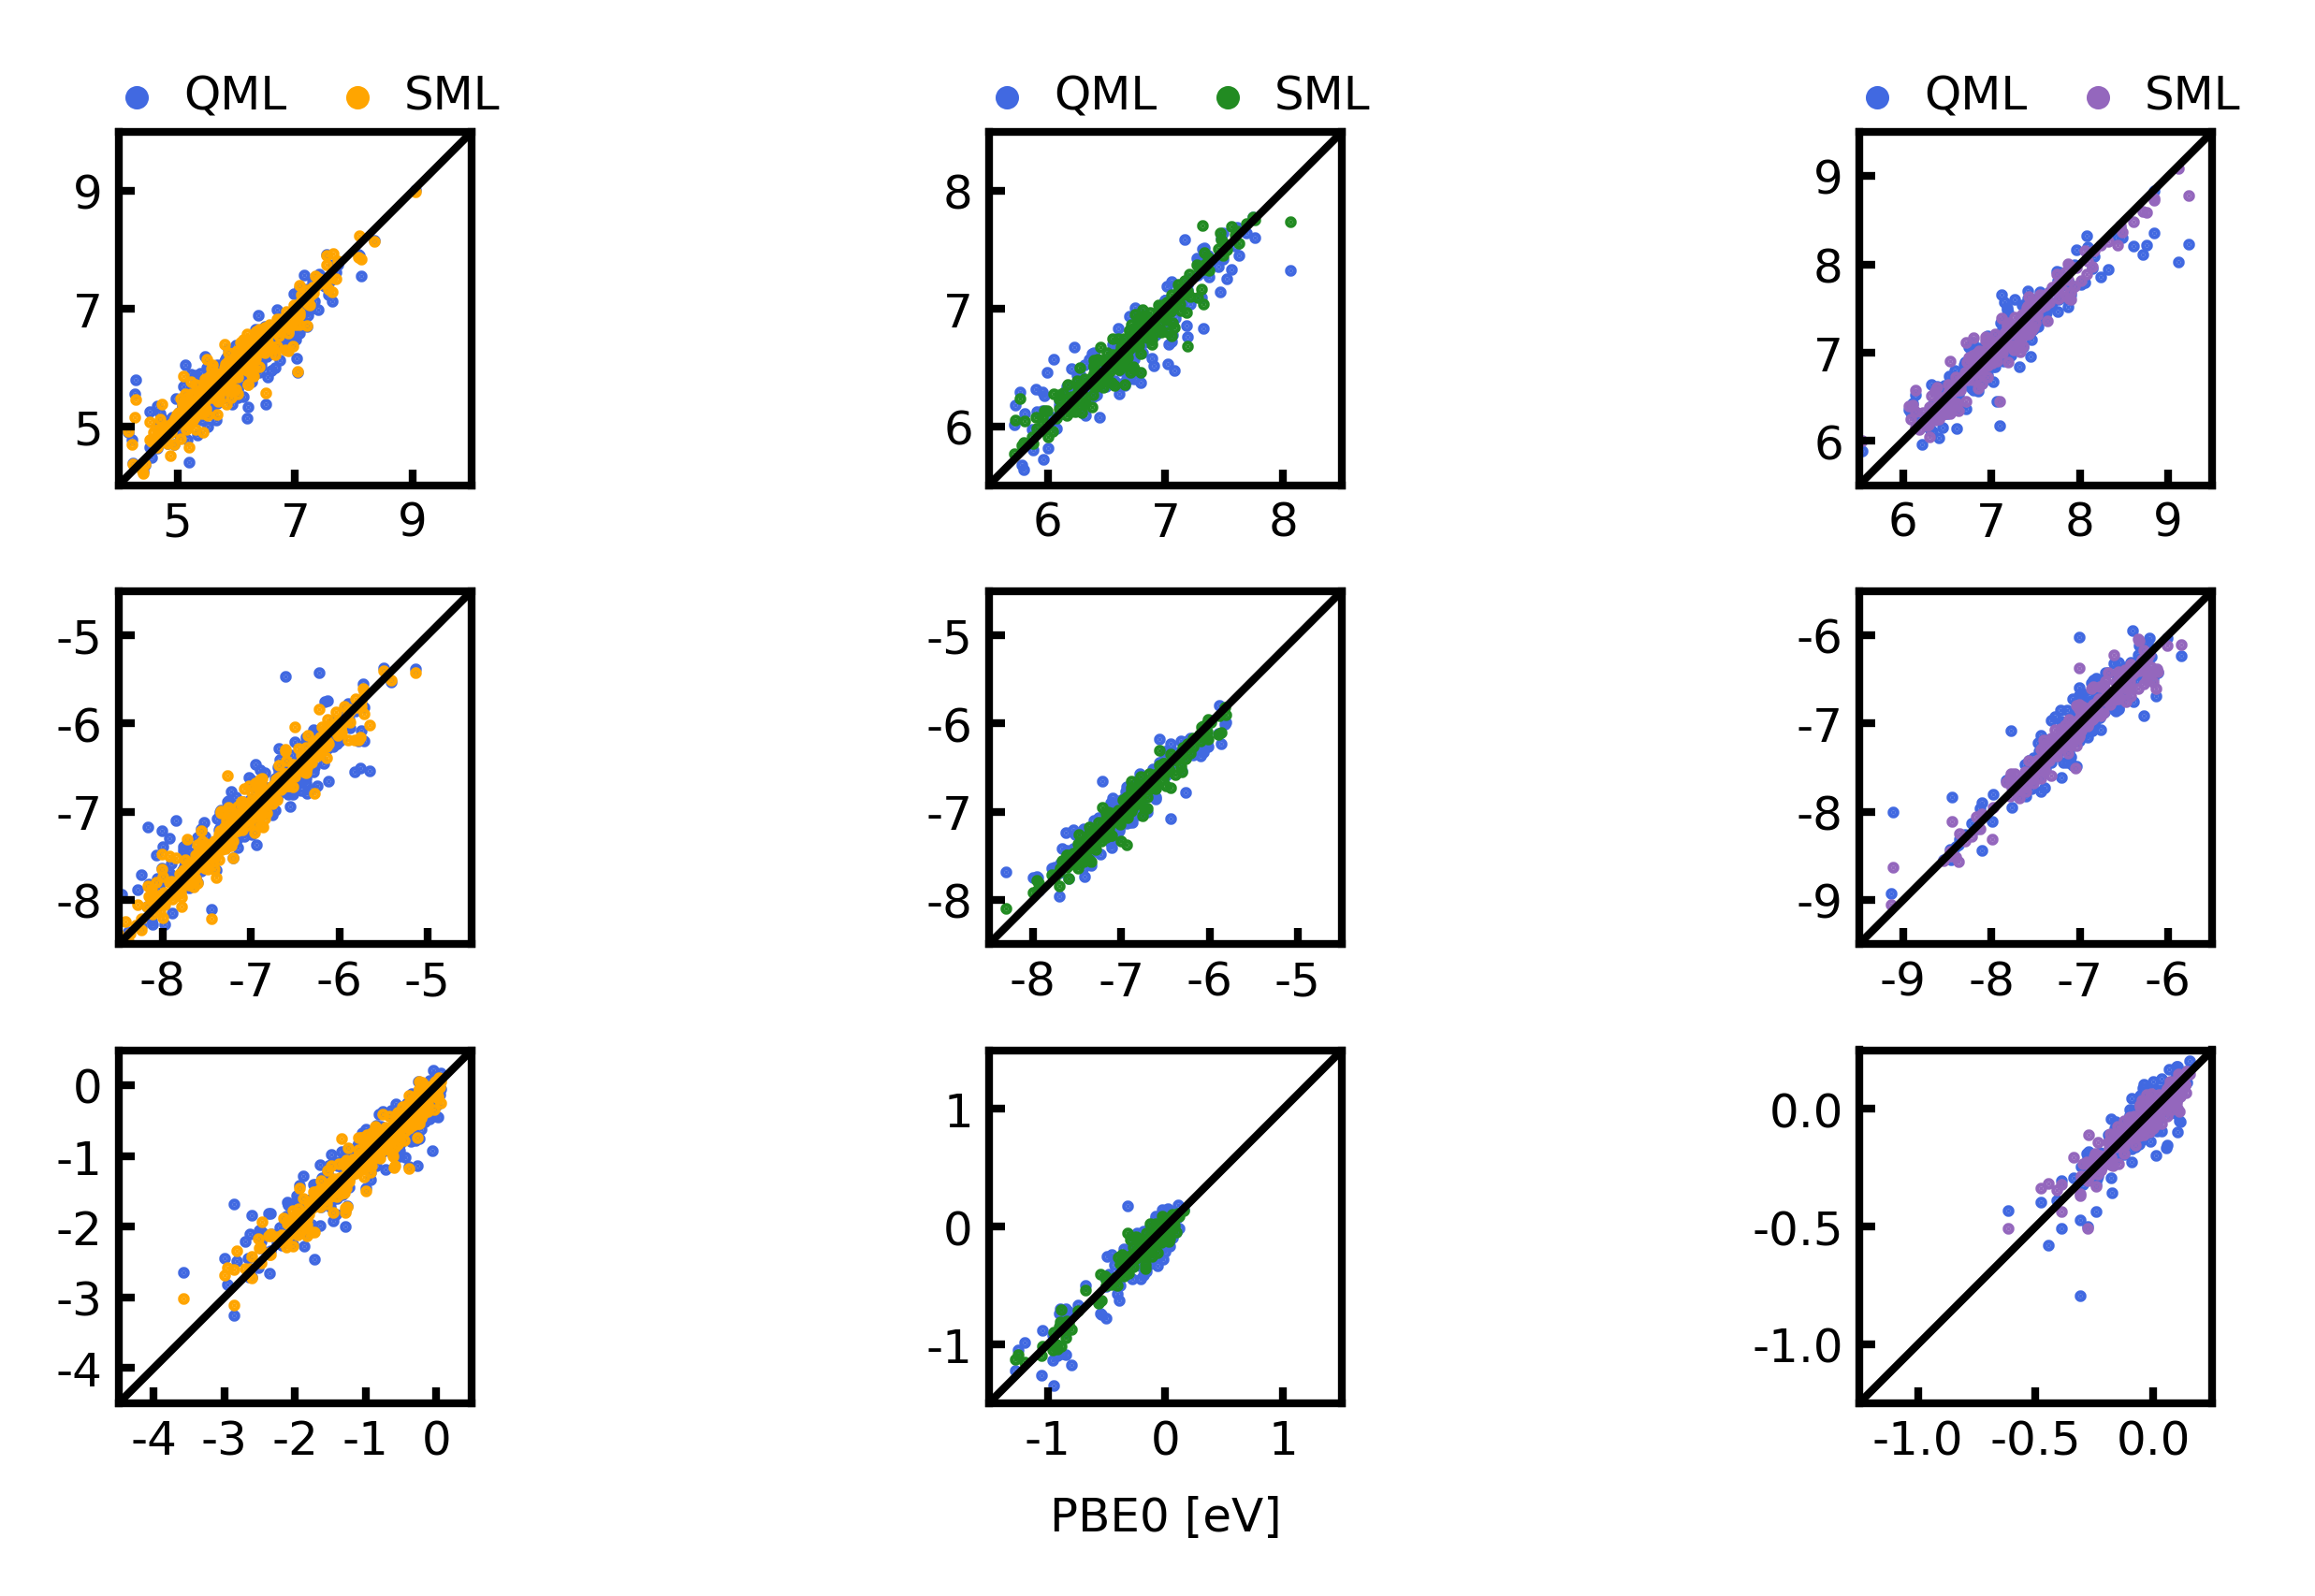

In [95]:
scatter_subplots_array(res_qm7b, props_pbe0, [0, 1, 2], train_sizes_qm7b, color, color_subsets, labels_qm7b, xticks_qm7b, x_label_pbe0, y_labels, 
                       True, '../figures/scatter_qm7b_pbe0.png')

In [96]:
get_min_max_values(res_delta['(G_PBE0,G_GW)'], 0, 1600)

(7.772279602223986, 11.863937841492383)

In [97]:
get_min_max_values(res_delta['(G_PBE0,G_GW)'], 1, 1600)

(8.1731, 12.3939)

In [98]:
get_min_max_values(res_delta['(G_PBE0,G_GW)'], 2, 800)

(8.814834847463507, 12.44895880140298)

In [99]:
xticks_delta['(G_ZINDO,G_GW)']

{0: [8, 10, 12], 1: [8, 10, 12], 2: [8, 10, 12]}

In [100]:
xticks_delta['(G_PBE0,G_GW)'] = xticks_delta['(G_ZINDO,G_GW)']

In [101]:
get_min_max_values(res_delta['(H_PBE0,H_GW)'], 0, 1600)

(-11.1883, -7.0873)

In [102]:
get_min_max_values(res_delta['(H_PBE0,H_GW)'], 1, 1600)

(-10.1615, -7.561407663587039)

In [103]:
get_min_max_values(res_delta['(H_PBE0,H_GW)'], 2, 800)

(-11.6583, -7.930678044254433)

In [104]:
xticks_delta['(H_ZINDO,H_GW)']

{0: [-11, -9, -7], 1: [-10, -9, -8, -7], 2: [-12, -10, -8]}

In [105]:
xticks_delta['(H_PBE0,H_GW)'] = xticks_delta['(H_ZINDO,H_GW)']

In [106]:
get_min_max_values(res_delta['(L_PBE0,L_GW)'], 0, 1600)

(-1.6307054956168465, 1.6323)

In [107]:
get_min_max_values(res_delta['(L_PBE0,L_GW)'], 1, 1600)

(0.4552692405334552, 1.9068)

In [108]:
get_min_max_values(res_delta['(L_PBE0,L_GW)'], 2, 800)

(0.6155295882535191, 1.4893)

In [109]:
xticks_delta['(L_ZINDO,L_GW)']

{0: [-1, 0, 1, 2], 1: [0.5, 1.0, 1.5, 2.0], 2: [0.5, 1.0, 1.5, 2.0]}

In [110]:
xticks_delta['(L_PBE0,L_GW)'] = xticks_delta['(L_ZINDO,L_GW)']

In [111]:
props_pbe0_gw = ['(G_PBE0,G_GW)', '(H_PBE0,H_GW)', '(L_PBE0,L_GW)']

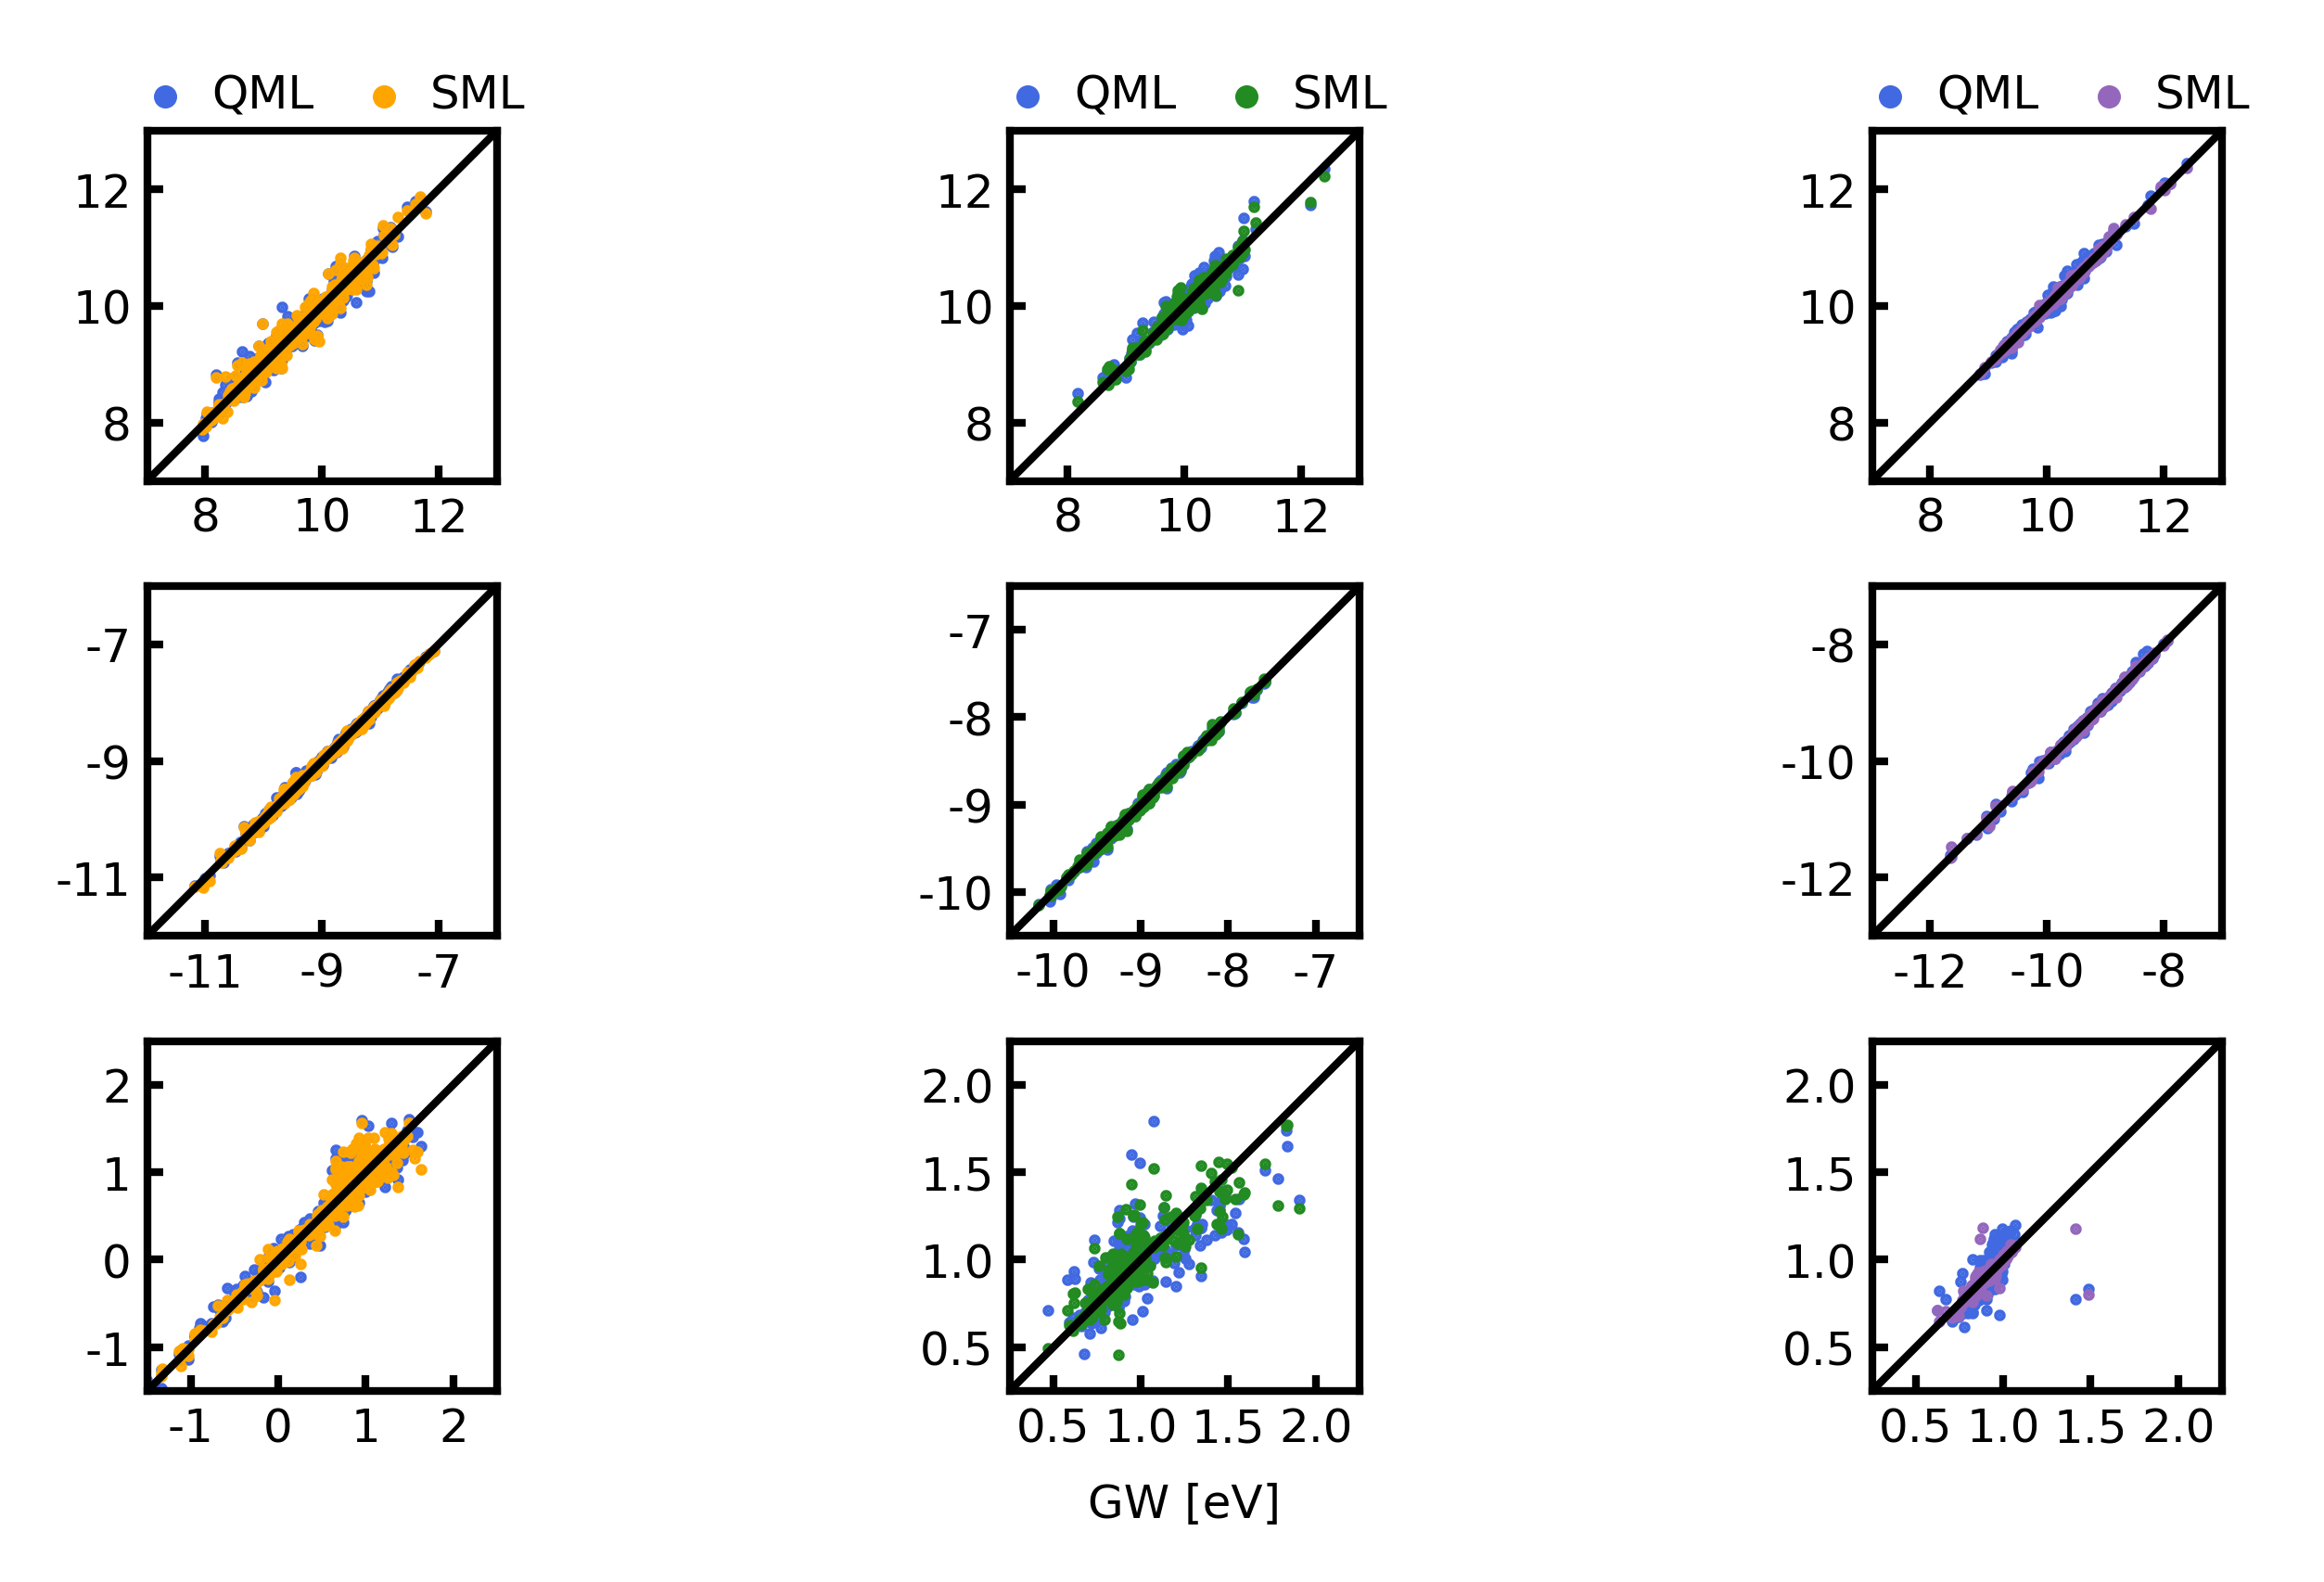

In [112]:
scatter_subplots_array(res_delta, props_pbe0_gw, [0, 1, 2], train_sizes_qm7b, color, color_subsets, labels_qm7b, xticks_delta, x_label, y_labels, 
                       True, '../figures/scatter_qm7b_delta_pbe0_gw.png')

In [113]:
get_min_max_values(res_delta['(G_ZINDO,G_PBE0)'], 0, 1600)

(3.780535676426428, 9.0489)

In [114]:
get_min_max_values(res_delta['(G_ZINDO,G_PBE0)'], 1, 1600)

(5.0042075530102395, 8.29933884012598)

In [115]:
get_min_max_values(res_delta['(G_ZINDO,G_PBE0)'], 2, 800)

(5.795885492343858, 10.828942810510192)

In [116]:
xticks_delta['(G_ZINDO,G_PBE0)'] = {0: [3, 5, 7, 9], 
                                    1: [5, 6, 7, 8], 
                                    2: [6, 8, 10]}

In [117]:
get_min_max_values(res_delta['(H_ZINDO,H_PBE0)'], 0, 1600)

(-8.848901477905647, -5.1164)

In [118]:
get_min_max_values(res_delta['(H_ZINDO,H_PBE0)'], 1, 1600)

(-8.091823341795422, -5.743660154293867)

In [119]:
get_min_max_values(res_delta['(H_ZINDO,H_PBE0)'], 2, 800)

(-9.1613, -5.881358936405201)

In [120]:
xticks_delta['(H_ZINDO,H_PBE0)'] = {0: [-9, -7, -5], 
                                    1: [-8, -7, -6, -5], 
                                    2: [-9, -8, -7, -6]}

In [121]:
get_min_max_values(res_delta['(L_ZINDO,L_PBE0)'], 0, 1600)

(-3.4251, 0.2655340524817116)

In [122]:
get_min_max_values(res_delta['(L_ZINDO,L_PBE0)'], 1, 1600)

(-1.3227728206084193, 0.25828963322483434)

In [123]:
get_min_max_values(res_delta['(L_ZINDO,L_PBE0)'], 2, 800)

(-0.7030011418093554, 0.7788262835052859)

In [124]:
xticks_delta['(L_ZINDO,L_PBE0)'] = {0: [-3, -2, -1, 0], 
                                    1: [-1.5, -0.5, 0.5], 
                                    2: [-0.5, 0, 0.5, 1.0]}

In [125]:
props_zindo_pbe0 = ['(G_ZINDO,G_PBE0)', '(H_ZINDO,H_PBE0)', '(L_ZINDO,L_PBE0)']

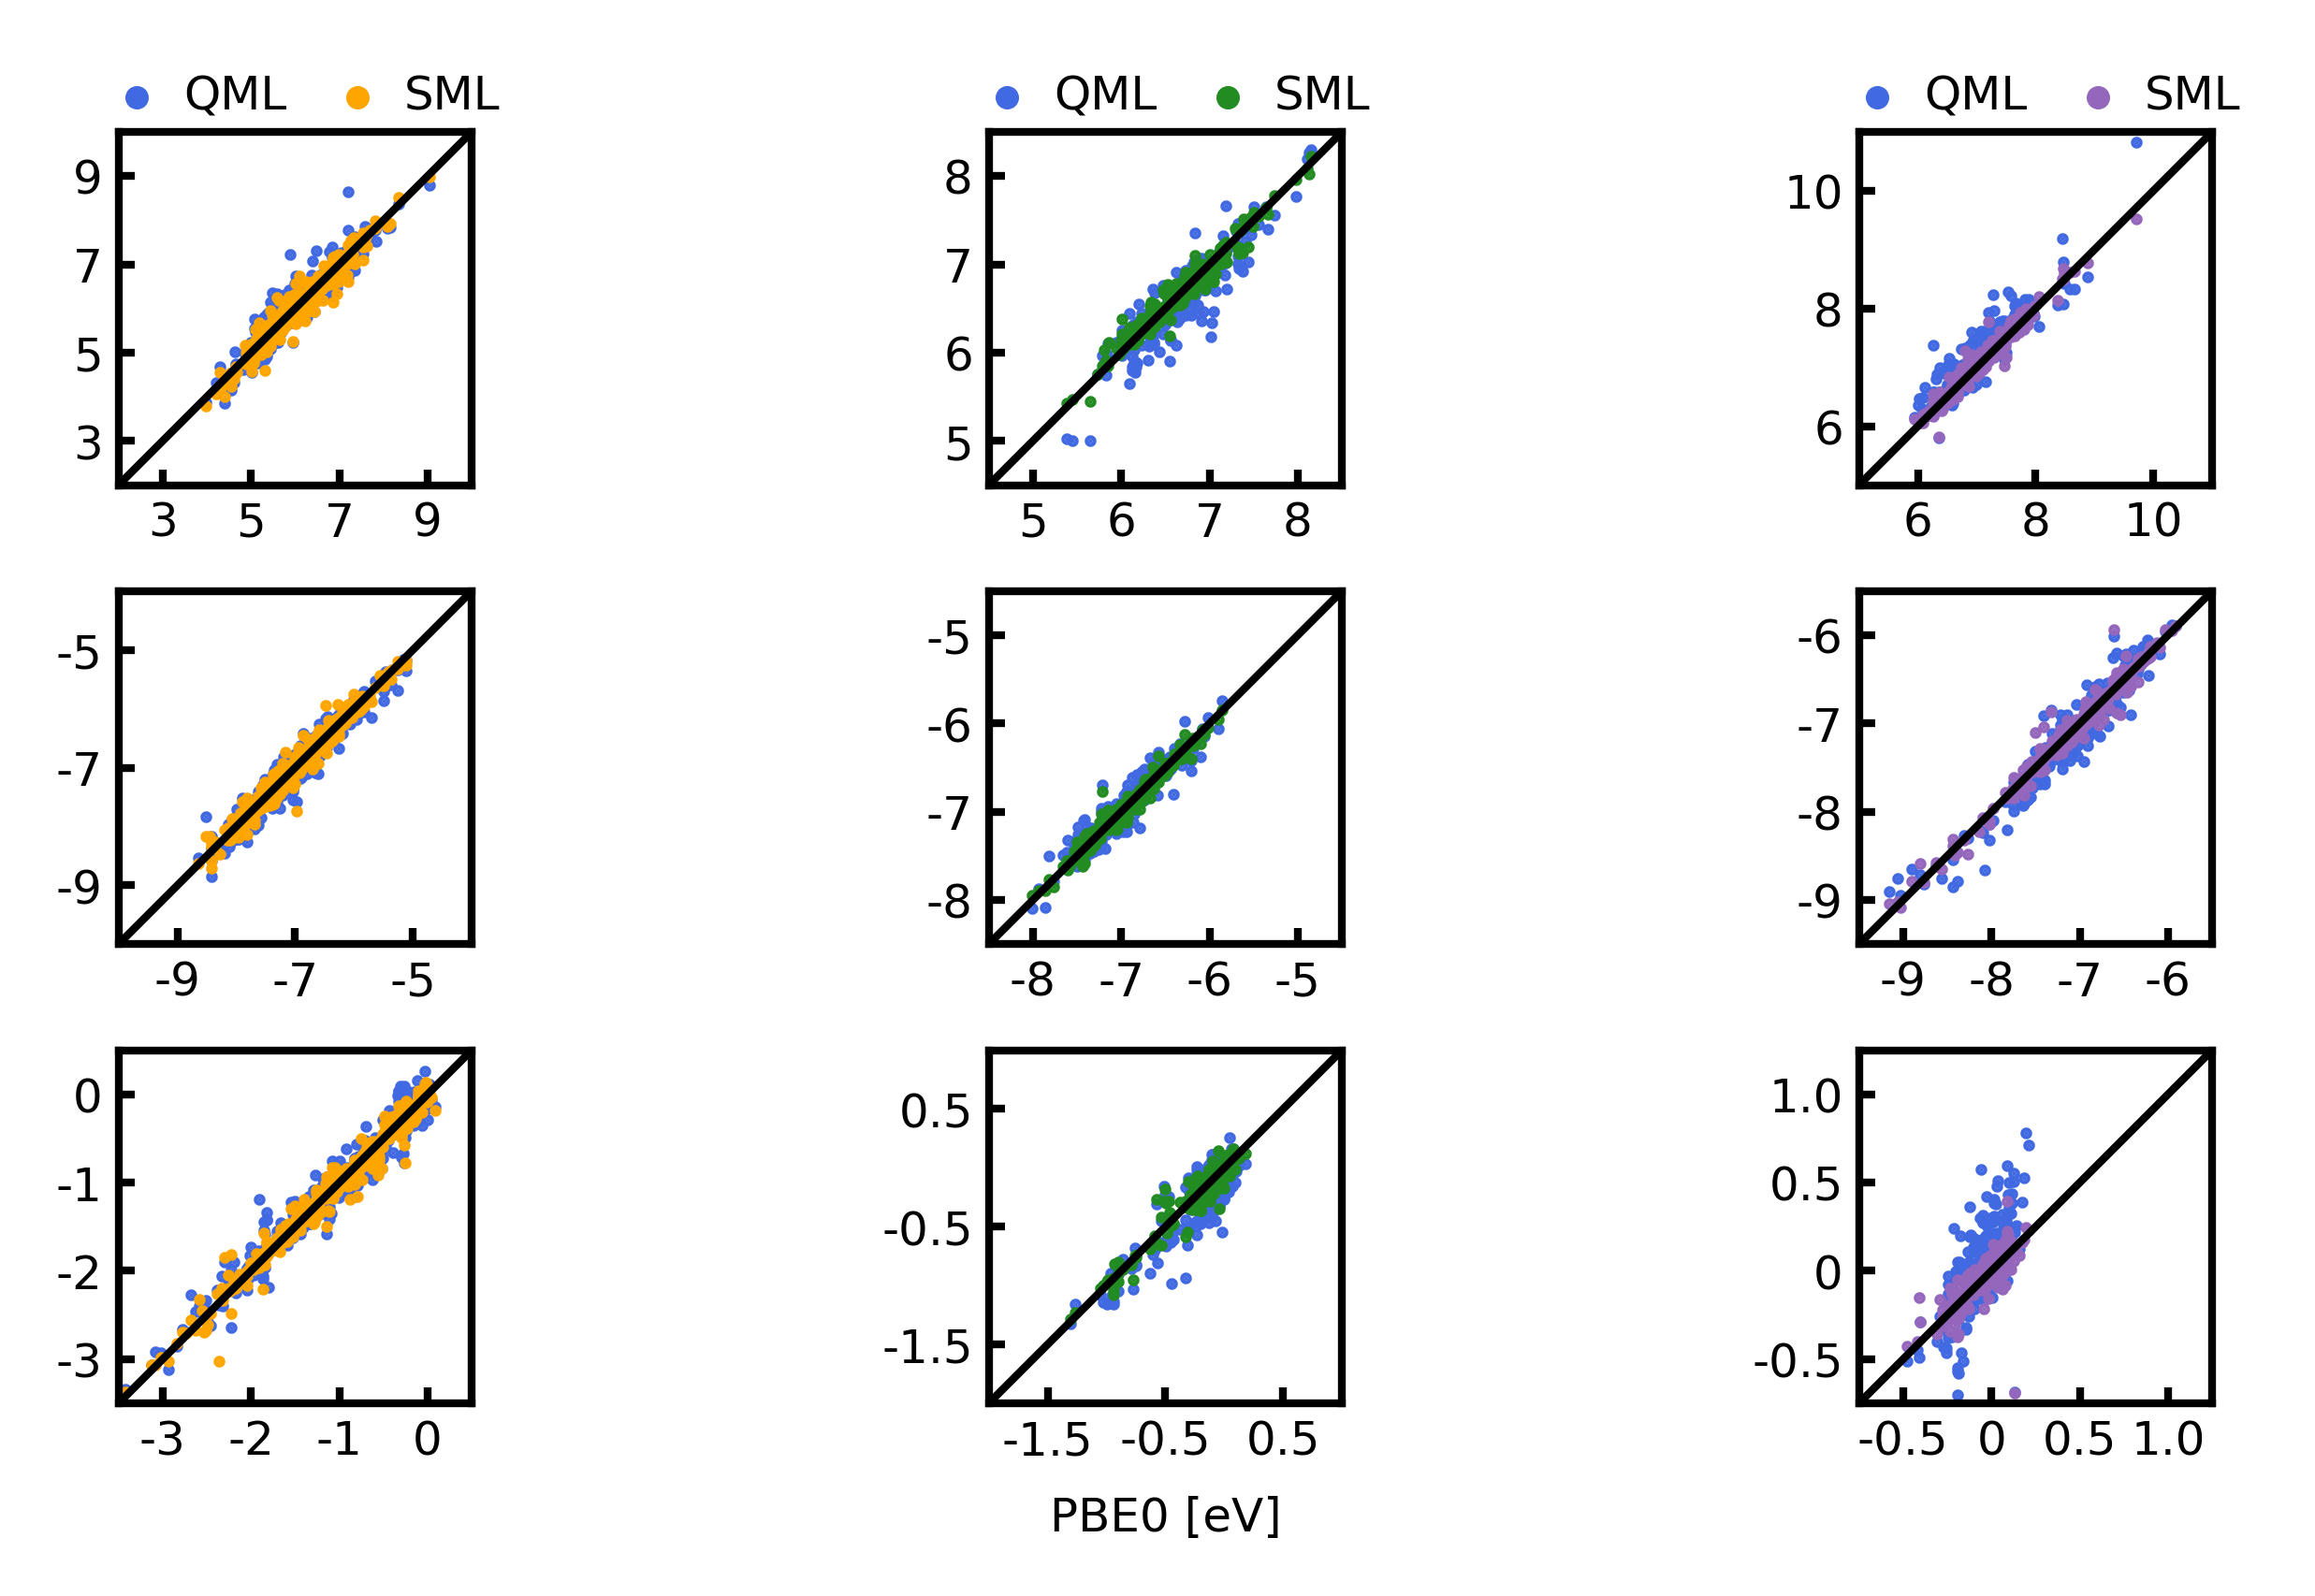

In [126]:
scatter_subplots_array(res_delta, props_zindo_pbe0, [0, 1, 2], train_sizes_qm7b, color, color_subsets, labels_qm7b, xticks_delta, x_label_pbe0, y_labels, 
                       True, '../figures/scatter_qm7b_delta_zindo_pbe0.png')